<a href="https://colab.research.google.com/github/Custardwh1pp/GoogleColab_DL/blob/main/AirREGI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [ ]:
# Google Driveのマウント
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_regi_acc_get = pd.read_csv('/content/drive/MyDrive/GCI/regi_acc_get_data_transform .csv')
df_regi_call = pd.read_csv('/content/drive/MyDrive/GCI/regi_call_data_transform .csv')
df_cm_data = pd.read_csv('/content/drive/MyDrive/GCI/cm_data .csv')
df_calendar = pd.read_csv('/content/drive/MyDrive/GCI/calender_data .csv')
df_gt_service = pd.read_csv('/content/drive/MyDrive/GCI/gt_service_name .csv')

## Data overview



In [ ]:
display(df_regi_acc_get.head())
display(df_regi_acc_get.info())
display(df_regi_call.head())
display(df_regi_call.info())
display(df_cm_data.head())
display(df_cm_data.info())
print("cmの分布:")
print(df_cm_data['cm_flg'].value_counts())
print(df_cm_data['cm_flg'].value_counts(normalize=True))
display(df_calendar.head())
display(df_calendar.info())
display(df_gt_service.head())
display(df_gt_service.info())

,acc_get_cnt
cdr_date,
2018-05-01,-0.926645
2018-05-02,-0.567495
2018-05-03,-1.050489
2018-05-04,-1.199103
2018-05-05,-1.360101


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 701 entries, 2018-05-01 to 2020-03-31
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   acc_get_cnt  701 non-null    float64
dtypes: float64(1)
memory usage: 11.0 KB


None

,call_num
cdr_date,
2018-06-01,183
2018-06-02,0
2018-06-03,0
2018-06-04,213
2018-06-05,143


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 670 entries, 2018-06-01 to 2020-03-31
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   call_num  670 non-null    int64
dtypes: int64(1)
memory usage: 10.5 KB


None

,cm_flg
cdr_date,
2018-03-01,0
2018-03-02,0
2018-03-03,0
2018-03-04,0
2018-03-05,0


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 762 entries, 2018-03-01 to 2020-03-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   cm_flg  762 non-null    int64
dtypes: int64(1)
memory usage: 11.9 KB


None

cmの分布:
cm_flg
0    555
1    207
Name: count, dtype: int64
cm_flg
0    0.728346
1    0.271654
Name: proportion, dtype: float64


,cdr_date,dow,dow_name,woy,wom,doy,financial_year,day_before_holiday_flag,holiday_flag,holiday_name,dow_name_en
0,2018-06-01,5,金,22,1,152,2018,True,False,NaN,Fri
1,2018-06-02,6,土,22,1,153,2018,True,True,NaN,Sat
2,2018-06-03,7,日,22,2,154,2018,False,True,NaN,Sun
3,2018-06-04,1,月,23,2,155,2018,False,False,NaN,Mon
4,2018-06-05,2,火,23,2,156,2018,False,False,NaN,Tue


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 670 entries, 0 to 669
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   cdr_date                 670 non-null    object
 1   dow                      670 non-null    int64 
 2   dow_name                 670 non-null    object
 3   woy                      670 non-null    int64 
 4   wom                      670 non-null    int64 
 5   doy                      670 non-null    int64 
 6   financial_year           670 non-null    int64 
 7   day_before_holiday_flag  670 non-null    bool  
 8   holiday_flag             670 non-null    bool  
 9   holiday_name             38 non-null     object
 10  dow_name_en              670 non-null    object
dtypes: bool(2), int64(5), object(4)
memory usage: 48.5+ KB


None

,search_cnt
week,
2018-03-04,49
2018-03-11,25
2018-03-18,31
2018-03-25,25
2018-04-01,19


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 109 entries, 2018-03-04 to 2020-03-29
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   search_cnt  109 non-null    int64
dtypes: int64(1)
memory usage: 1.7 KB


None

Missing values in df_regi_acc_get:
cdr_date       0
acc_get_cnt    0
dtype: int64


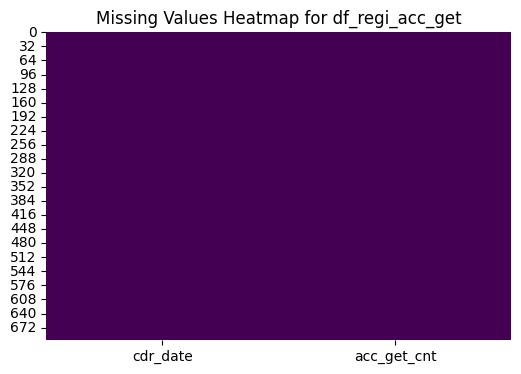


Missing values in df_regi_call:
cdr_date    0
call_num    0
dtype: int64


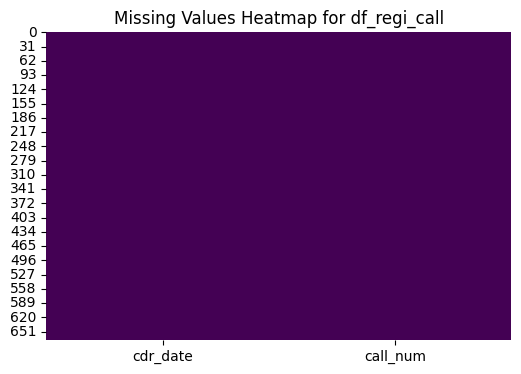


Missing values in df_cm_data:
cdr_date    0
cm_flg      0
dtype: int64


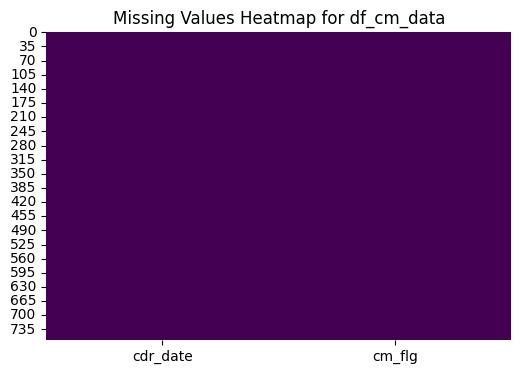


Missing values in df_calendar:
cdr_date                     0
dow                          0
dow_name                     0
woy                          0
wom                          0
doy                          0
financial_year               0
day_before_holiday_flag      0
holiday_flag                 0
holiday_name               632
dtype: int64


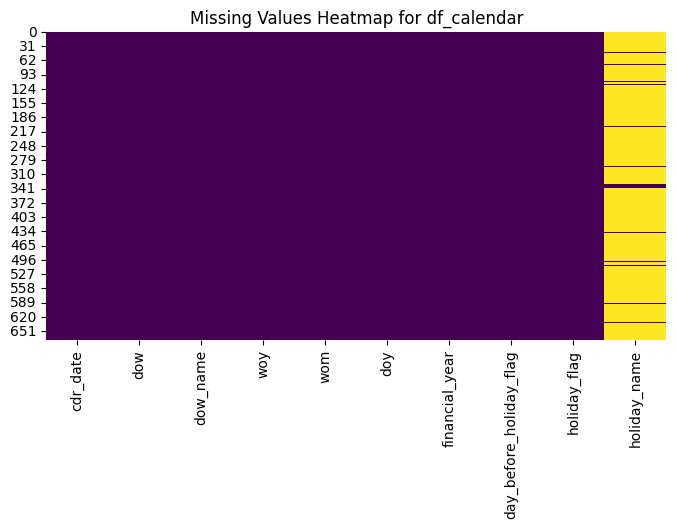


Missing values in df_gt_service:
week          0
search_cnt    0
dtype: int64


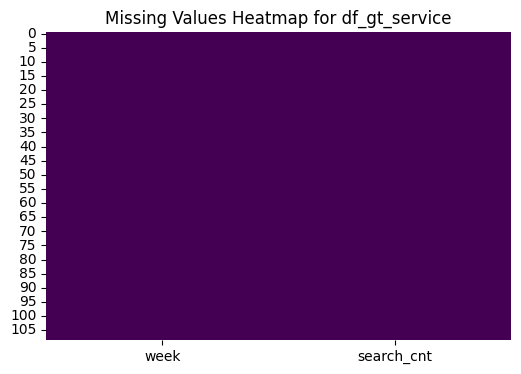

In [ ]:
print("Missing values in df_regi_acc_get:")
print(df_regi_acc_get.isnull().sum())
plt.figure(figsize=(6, 4))
sns.heatmap(df_regi_acc_get.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap for df_regi_acc_get')
plt.show()

print("\nMissing values in df_regi_call:")
print(df_regi_call.isnull().sum())
plt.figure(figsize=(6, 4))
sns.heatmap(df_regi_call.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap for df_regi_call')
plt.show()

print("\nMissing values in df_cm_data:")
print(df_cm_data.isnull().sum())
plt.figure(figsize=(6, 4))
sns.heatmap(df_cm_data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap for df_cm_data')
plt.show()

print("\nMissing values in df_calendar:")
print(df_calendar.isnull().sum())
plt.figure(figsize=(8, 4))
sns.heatmap(df_calendar.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap for df_calendar')
plt.show()

print("\nMissing values in df_gt_service:")
print(df_gt_service.isnull().sum())
plt.figure(figsize=(6, 4))
sns.heatmap(df_gt_service.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap for df_gt_service')
plt.show()

## Summary statistics


In [ ]:
print("Descriptive statistics for df_regi_acc_get:")
display(df_regi_acc_get.describe())

print("\nDescriptive statistics for df_regi_call:")
display(df_regi_call.describe())

print("\nDescriptive statistics for df_cm_data:")
display(df_cm_data.describe())

print("\nDescriptive statistics for df_calendar:")
display(df_calendar.describe())

print("\nDescriptive statistics for df_gt_service:")
display(df_gt_service.describe())

Descriptive statistics for df_regi_acc_get:


,acc_get_cnt
count,701.000000
mean,0.000000
std,1.000000
min,-1.508715
25%,-0.604648
50%,-0.220730
75%,0.336571
max,7.148030



Descriptive statistics for df_regi_call:


,call_num
count,670.000000
mean,116.485075
std,119.924075
min,0.000000
25%,0.000000
50%,121.000000
75%,161.000000
max,757.000000



Descriptive statistics for df_cm_data:


,cm_flg
count,762.000000
mean,0.271654
std,0.445104
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000



Descriptive statistics for df_calendar:


,dow,woy,wom,doy,financial_year
count,670.000000,670.000000,670.000000,670.000000,670.000000
mean,4.001493,27.241791,3.114925,188.507463,2018.546269
std,2.004106,15.417209,1.314602,108.248782,0.498227
min,1.000000,1.000000,1.000000,1.000000,2018.000000
25%,2.000000,12.250000,2.000000,84.250000,2018.000000
50%,4.000000,29.000000,3.000000,198.000000,2019.000000
75%,6.000000,40.750000,4.000000,281.750000,2019.000000
max,7.000000,52.000000,6.000000,365.000000,2019.000000



Descriptive statistics for df_gt_service:


,search_cnt
count,109.000000
mean,35.348624
std,17.573853
min,6.000000
25%,24.000000
50%,32.000000
75%,46.000000
max,100.000000


## Visualize distributions



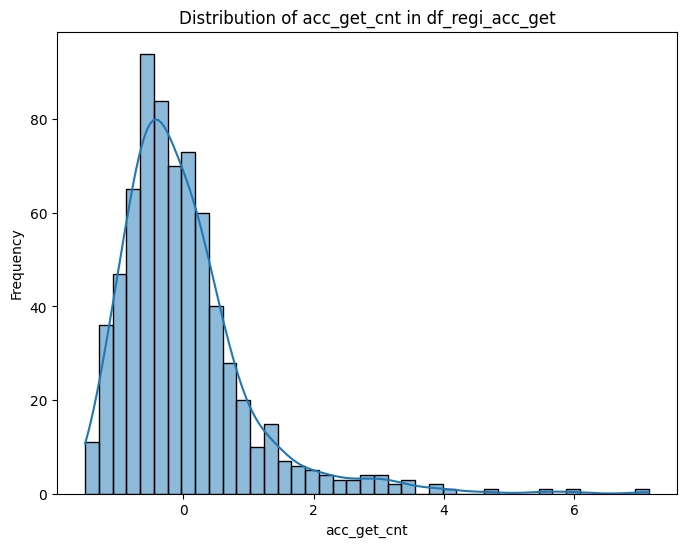

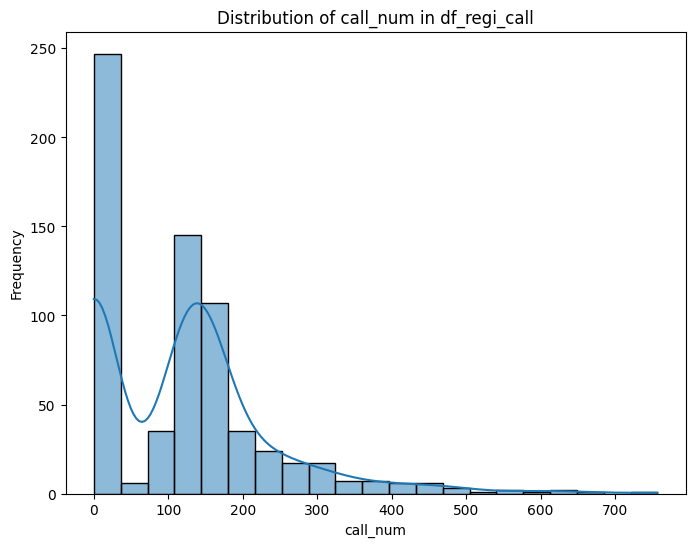

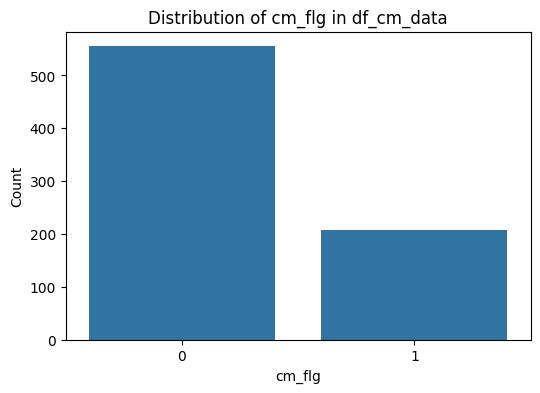

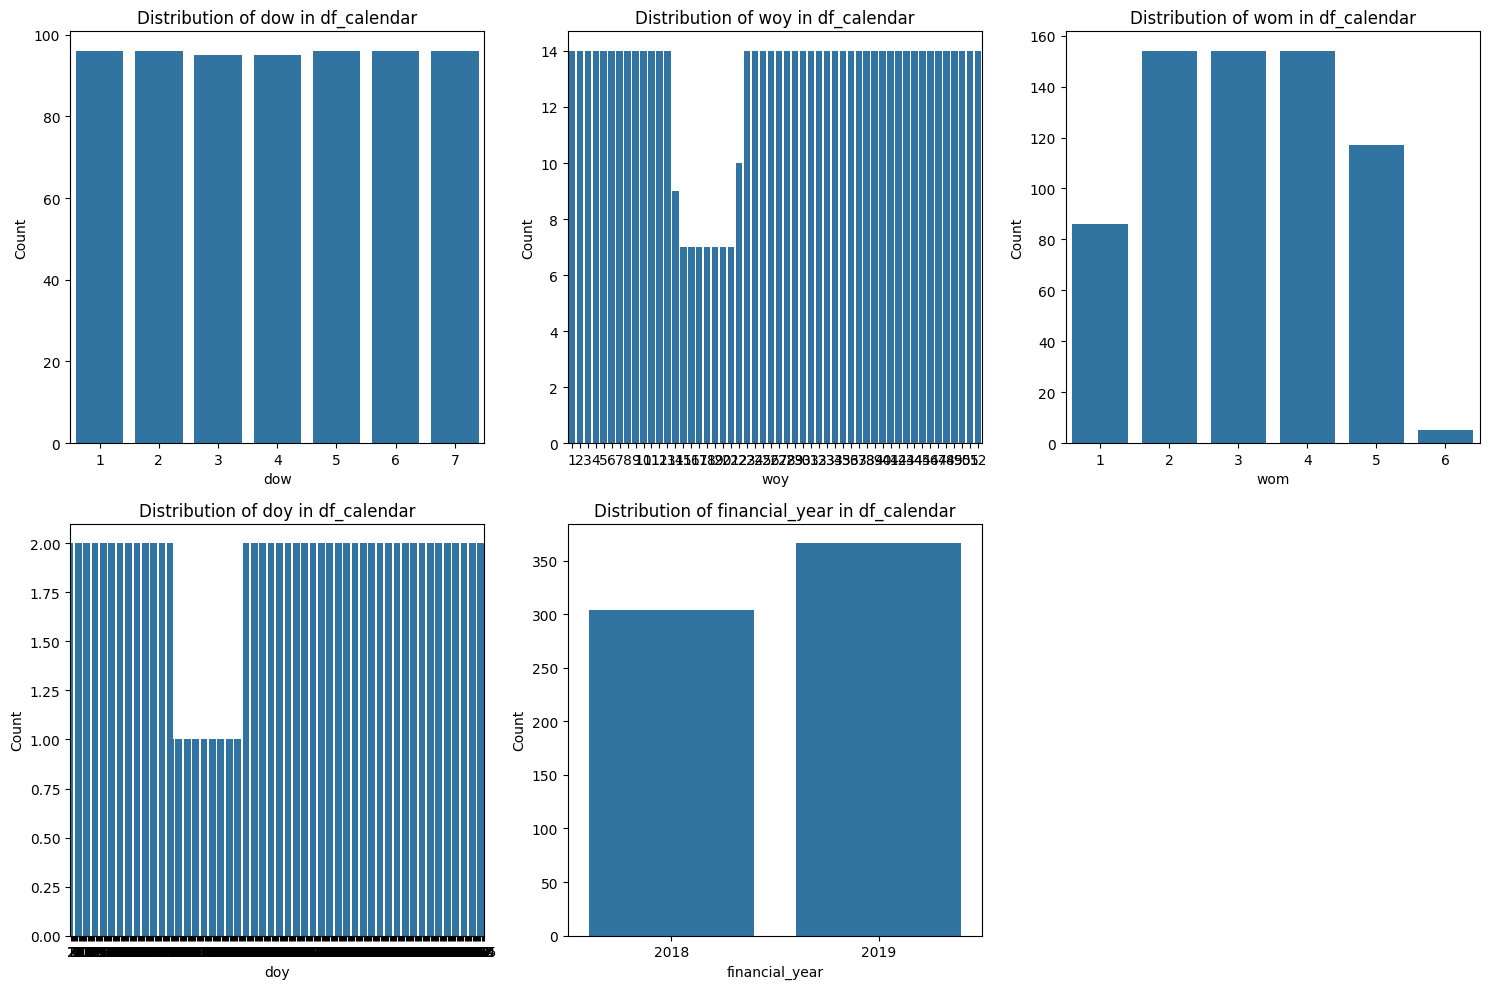

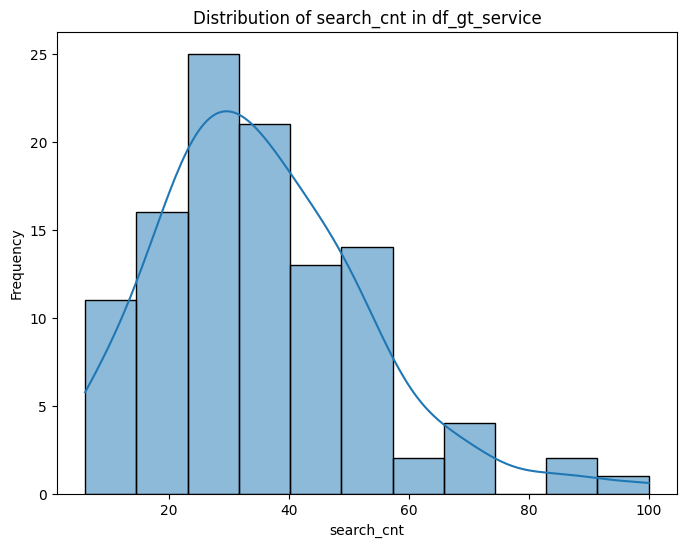

In [ ]:
# 1. Histogram for df_regi_acc_get['acc_get_cnt']
plt.figure(figsize=(8, 6))
sns.histplot(df_regi_acc_get['acc_get_cnt'], kde=True)
plt.title('Distribution of acc_get_cnt in df_regi_acc_get')
plt.xlabel('acc_get_cnt')
plt.ylabel('Frequency')
plt.show()

# 2. Histogram for df_regi_call['call_num']
plt.figure(figsize=(8, 6))
sns.histplot(df_regi_call['call_num'], kde=True)
plt.title('Distribution of call_num in df_regi_call')
plt.xlabel('call_num')
plt.ylabel('Frequency')
plt.show()

# 3. Count plot for df_cm_data['cm_flg']
plt.figure(figsize=(6, 4))
sns.countplot(x='cm_flg', data=df_cm_data)
plt.title('Distribution of cm_flg in df_cm_data')
plt.xlabel('cm_flg')
plt.ylabel('Count')
plt.show()

# 4. Visualizations for df_calendar date-related numerical columns
calendar_cols = ['dow', 'woy', 'wom', 'doy', 'financial_year']
plt.figure(figsize=(15, 10))
for i, col in enumerate(calendar_cols):
    plt.subplot(2, 3, i + 1)
    sns.countplot(x=col, data=df_calendar)
    plt.title(f'Distribution of {col} in df_calendar')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 5. Histogram for df_gt_service['search_cnt']
plt.figure(figsize=(8, 6))
sns.histplot(df_gt_service['search_cnt'], kde=True)
plt.title('Distribution of search_cnt in df_gt_service')
plt.xlabel('search_cnt')
plt.ylabel('Frequency')
plt.show()

## Analyze time series data



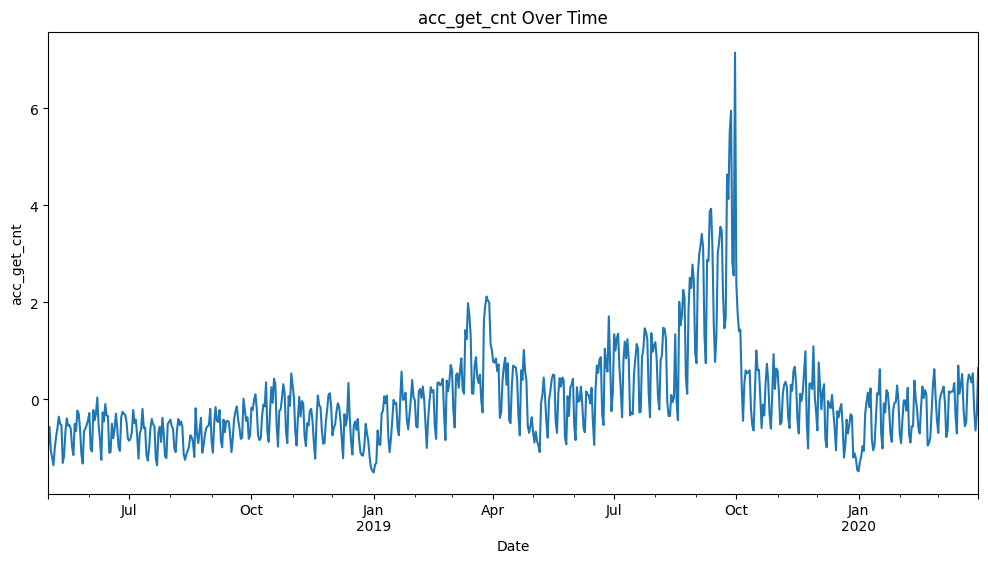

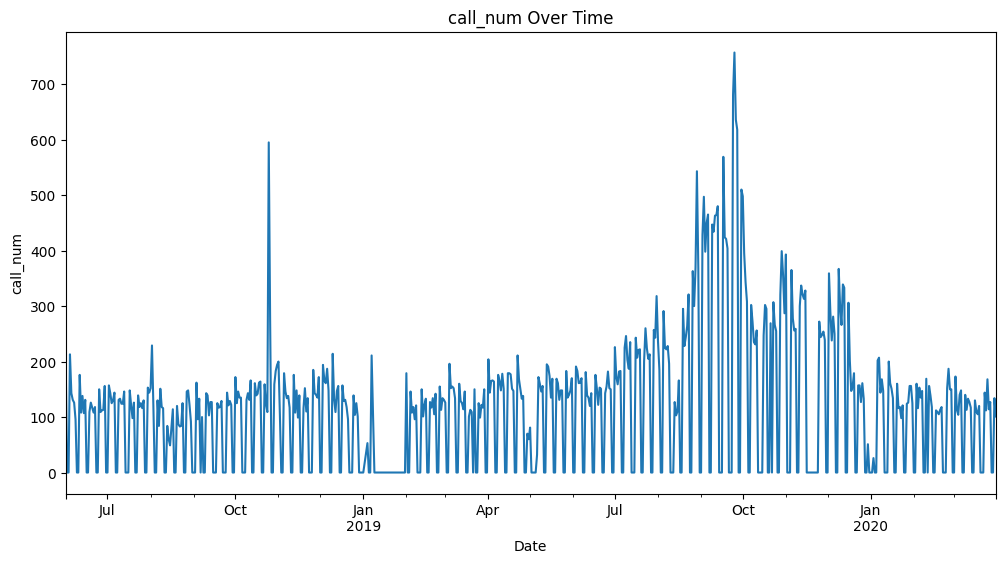

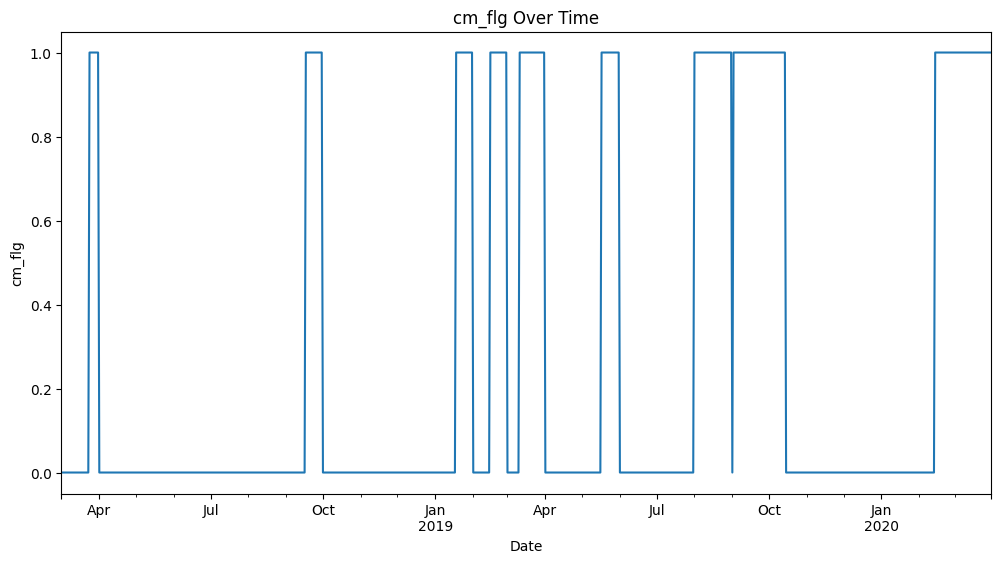

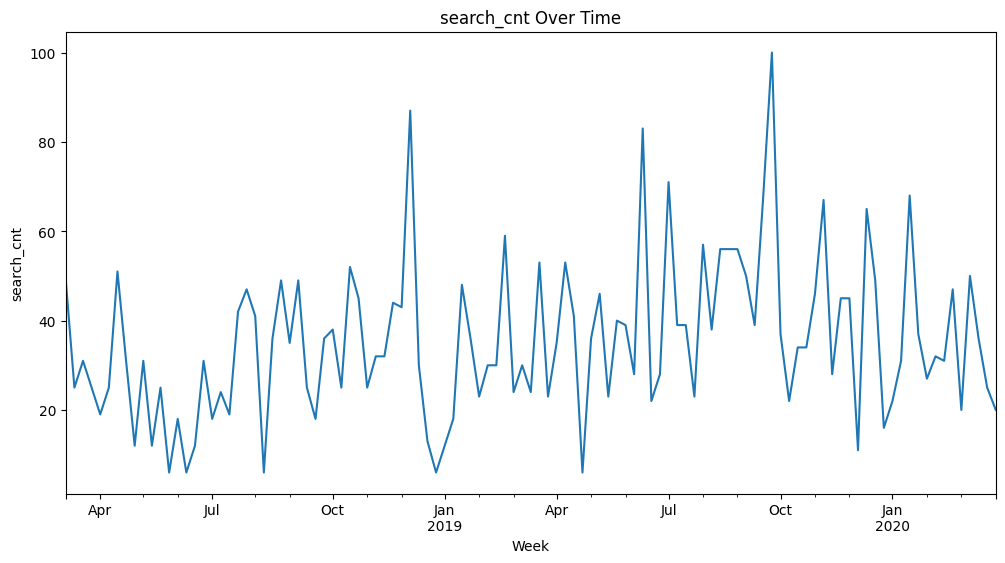

In [ ]:
# Convert date columns to datetime and set as index
df_regi_acc_get['cdr_date'] = pd.to_datetime(df_regi_acc_get['cdr_date'])
df_regi_acc_get.set_index('cdr_date', inplace=True)

df_regi_call['cdr_date'] = pd.to_datetime(df_regi_call['cdr_date'])
df_regi_call.set_index('cdr_date', inplace=True)

df_cm_data['cdr_date'] = pd.to_datetime(df_cm_data['cdr_date'])
df_cm_data.set_index('cdr_date', inplace=True)

df_gt_service['week'] = pd.to_datetime(df_gt_service['week'])
df_gt_service.set_index('week', inplace=True)

# Create time series plots
plt.figure(figsize=(12, 6))
df_regi_acc_get['acc_get_cnt'].plot()
plt.title('acc_get_cnt Over Time')
plt.xlabel('Date')
plt.ylabel('acc_get_cnt')
plt.show()

plt.figure(figsize=(12, 6))
df_regi_call['call_num'].plot()
plt.title('call_num Over Time')
plt.xlabel('Date')
plt.ylabel('call_num')
plt.show()

plt.figure(figsize=(12, 6))
df_cm_data['cm_flg'].plot()
plt.title('cm_flg Over Time')
plt.xlabel('Date')
plt.ylabel('cm_flg')
plt.show()

plt.figure(figsize=(12, 6))
df_gt_service['search_cnt'].plot()
plt.title('search_cnt Over Time')
plt.xlabel('Week')
plt.ylabel('search_cnt')
plt.show()

## Analyze categorical data




dow_nameのdf_calendarにおける値の出現回数:


,count
dow_name,
金,96
土,96
日,96
月,96
火,96
水,95
木,95


/tmp/ipython-input-13-2157390100.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='dow_name_en', data=df_calendar, order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], palette='viridis')


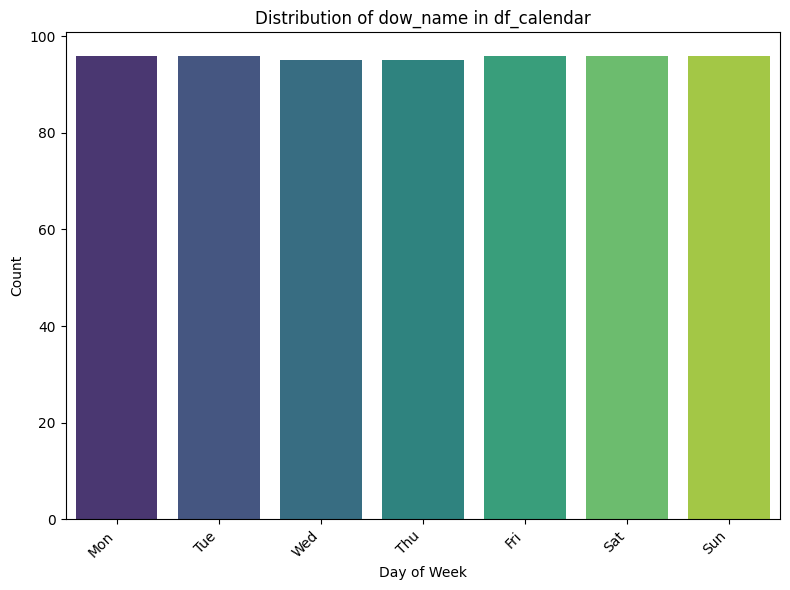


day_before_holiday_flagのdf_calendarにおける値の出現回数:


,count
day_before_holiday_flag,
False,450
True,220


/tmp/ipython-input-13-2157390100.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_calendar, order=df_calendar[col].value_counts().index, palette='viridis')


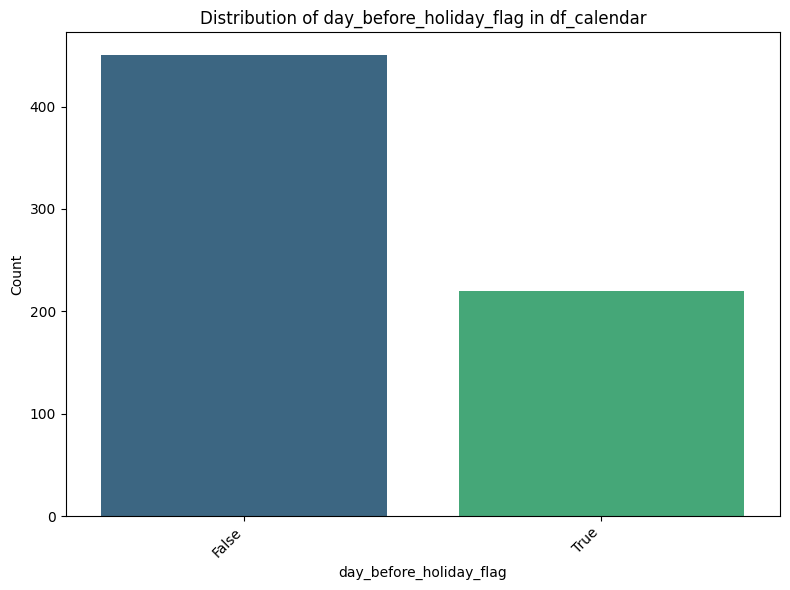


holiday_flagのdf_calendarにおける値の出現回数:


,count
holiday_flag,
False,450
True,220


/tmp/ipython-input-13-2157390100.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_calendar, order=df_calendar[col].value_counts().index, palette='viridis')


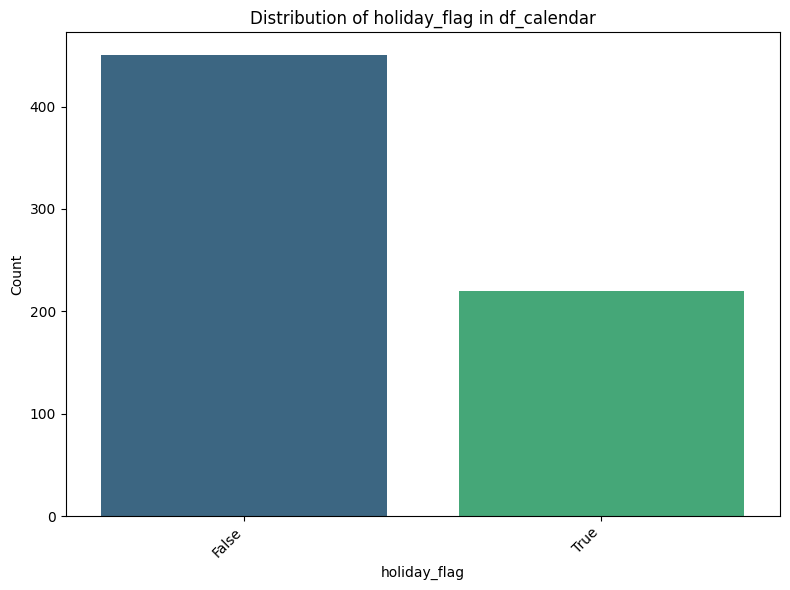


holiday_nameのdf_calendarにおける値の出現回数:


,count
holiday_name,
休日,8
山の日,2
海の日,2
敬老の日,2
秋分の日,2
体育の日,2
文化の日,2
勤労感謝の日,2
天皇誕生日,2


holiday_nameはユニークなカテゴリが多いため、カウントプロットをスキップします。


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

categorical_cols = ['dow_name', 'day_before_holiday_flag', 'holiday_flag', 'holiday_name']

# dow_nameの日本語から英語へのマッピング
dow_name_mapping = {
    '月': 'Mon',
    '火': 'Tue',
    '水': 'Wed',
    '木': 'Thu',
    '金': 'Fri',
    '土': 'Sat',
    '日': 'Sun'
}
df_calendar['dow_name_en'] = df_calendar['dow_name'].map(dow_name_mapping)


for col in categorical_cols:
    print(f"\n{col}のdf_calendarにおける値の出現回数:")
    display(df_calendar[col].value_counts())

    # ユニークなカテゴリが適度な数の列に対して分布を可視化
    if df_calendar[col].nunique() <= 10 and col != 'holiday_name': # holiday_nameはスキップ
        plt.figure(figsize=(8, 6))
        if col == 'dow_name':
             sns.countplot(x='dow_name_en', data=df_calendar, order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], palette='viridis')
             plt.title(f'Distribution of dow_name in df_calendar')
             plt.xlabel('Day of Week')
        else:
            sns.countplot(x=col, data=df_calendar, order=df_calendar[col].value_counts().index, palette='viridis')
            plt.title(f'Distribution of {col} in df_calendar') # タイトルを英語に修正
            plt.xlabel(col) # xlabelは列名そのまま

        plt.ylabel('Count') # ylabelを英語に修正
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    else:
        print(f"{col}はユニークなカテゴリが多いため、カウントプロットをスキップします。")

## Correlation analysis


Correlation Matrix for df_calendar:


,dow,woy,wom,doy,financial_year
dow,1.000000,0.001682,-0.046021,0.000134,-0.008303
woy,0.001682,1.000000,0.052171,0.974850,-0.057698
wom,-0.046021,0.052171,1.000000,0.076805,-0.057198
doy,0.000134,0.974850,0.076805,1.000000,-0.058417
financial_year,-0.008303,-0.057698,-0.057198,-0.058417,1.000000


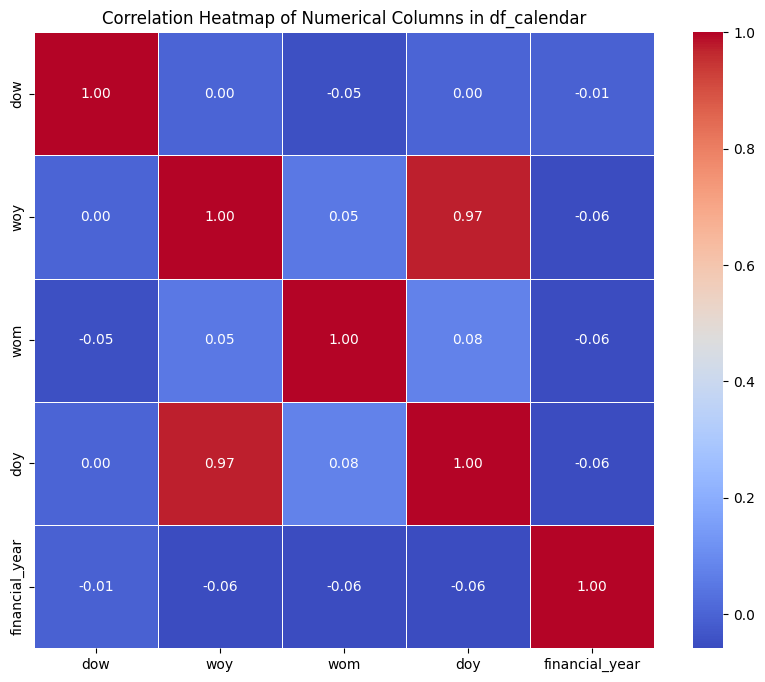


Note: df_regi_acc_get, df_regi_call, and df_gt_service each contain only one numerical column.
A direct correlation analysis between these dataframes is not straightforward at this stage.


In [ ]:
# 1. Create a correlation matrix for the numerical columns in df_calendar
numerical_cols_calendar = df_calendar.select_dtypes(include=np.number).columns
correlation_matrix_calendar = df_calendar[numerical_cols_calendar].corr()

print("Correlation Matrix for df_calendar:")
display(correlation_matrix_calendar)

# 2. Create a heatmap of the correlation matrix for df_calendar
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_calendar, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Columns in df_calendar')
plt.show()

# 3. Note the limitation for other dataframes
print("\nNote: df_regi_acc_get, df_regi_call, and df_gt_service each contain only one numerical column.")
print("A direct correlation analysis between these dataframes is not straightforward at this stage.")

doyとwoyの相関はともに時間経過を表すため相関は高い

# EDA2
"df_regi_acc_get"、"df_cm_data"、"df_regi_call" の3つのデータフレームを結合し、アカウント獲得数とCMフラグ、コール数の関連性を分析

## データ結合

### Subtask:
df_regi_acc_get、df_cm_data、df_regi_call を日付をキーとして結合し、統合されたデータフレームを作成


In [ ]:
# Reset index to use cdr_date as a column for merging
df_regi_acc_get_reset = df_regi_acc_get.reset_index()
df_cm_data_reset = df_cm_data.reset_index()
df_regi_call_reset = df_regi_call.reset_index()

# Merge df_regi_acc_get and df_cm_data on 'cdr_date'
df_merged_temp = pd.merge(df_regi_acc_get_reset, df_cm_data_reset, on='cdr_date', how='inner')

# Merge the result with df_regi_call on 'cdr_date'
df_merged = pd.merge(df_merged_temp, df_regi_call_reset, on='cdr_date', how='inner')

# Display the first few rows and data types of the merged dataframe
print("Merged DataFrame Head:")
display(df_merged.head())

print("\nMerged DataFrame Info:")
display(df_merged.info())

Merged DataFrame Head:


,cdr_date,acc_get_cnt,cm_flg,call_num
0,2018-06-01,-0.282652,0,183
1,2018-06-02,-1.025720,0,0
2,2018-06-03,-1.075258,0,0
3,2018-06-04,-0.220730,0,213
4,2018-06-05,-0.431266,0,143



Merged DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 670 entries, 0 to 669
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   cdr_date     670 non-null    datetime64[ns]
 1   acc_get_cnt  670 non-null    float64       
 2   cm_flg       670 non-null    int64         
 3   call_num     670 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 21.1 KB


None

## 関連分析

### Subtask:
結合したデータフレームを使用して、アカウント獲得数とCMフラグ、コール数の間の関連性を分析


Correlation Matrix for df_merged:


,acc_get_cnt,cm_flg,call_num
acc_get_cnt,1.000000,0.431459,0.710587
cm_flg,0.431459,1.000000,0.118200
call_num,0.710587,0.118200,1.000000



Correlation Coefficients:
cm_flg      0.431459
call_num    0.710587
Name: acc_get_cnt, dtype: float64

Mean acc_get_cnt by cm_flg:


,acc_get_cnt
cm_flg,
0,-0.247681
1,0.702629


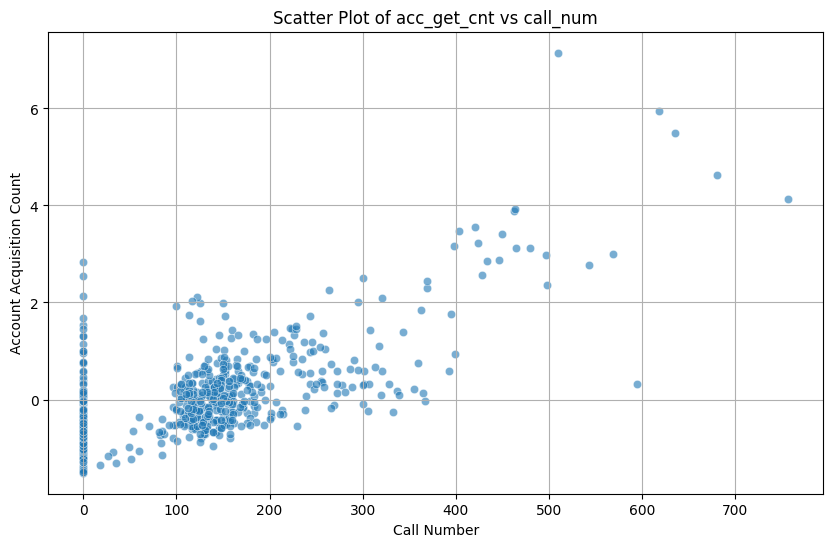

In [ ]:
# 1. Calculate the correlation matrix for the numerical columns in df_merged
numerical_cols_merged = ['acc_get_cnt', 'cm_flg', 'call_num']
correlation_matrix_merged = df_merged[numerical_cols_merged].corr()

print("Correlation Matrix for df_merged:")
display(correlation_matrix_merged)

# 2. Check the correlation coefficients between acc_get_cnt, cm_flg, and call_num
print("\nCorrelation Coefficients:")
print(correlation_matrix_merged.loc['acc_get_cnt', ['cm_flg', 'call_num']])

# 3. Compare the mean of acc_get_cnt for days with and without CM (cm_flg)
mean_acc_get_by_cm = df_merged.groupby('cm_flg')['acc_get_cnt'].mean()

print("\nMean acc_get_cnt by cm_flg:")
display(mean_acc_get_by_cm)

# 4. Create a scatter plot between acc_get_cnt and call_num
plt.figure(figsize=(10, 6))
sns.scatterplot(x='call_num', y='acc_get_cnt', data=df_merged, alpha=0.6)
plt.title('Scatter Plot of acc_get_cnt vs call_num')
plt.xlabel('Call Number')
plt.ylabel('Account Acquisition Count')
plt.grid(True)
plt.show()

## 結果の可視化


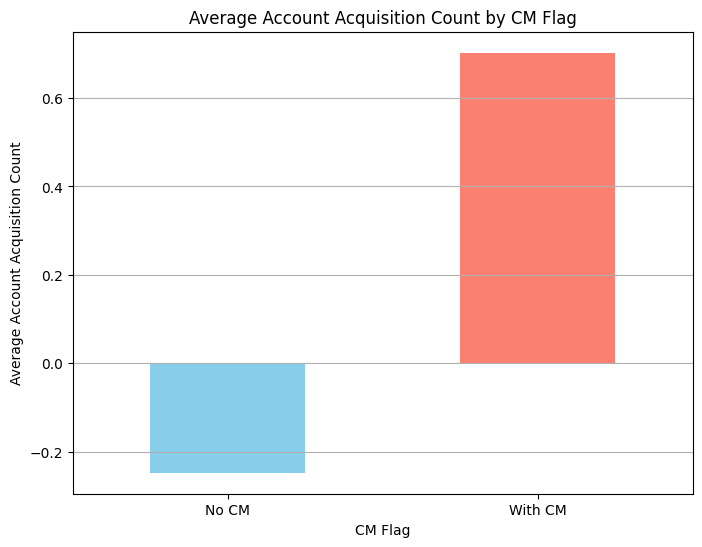

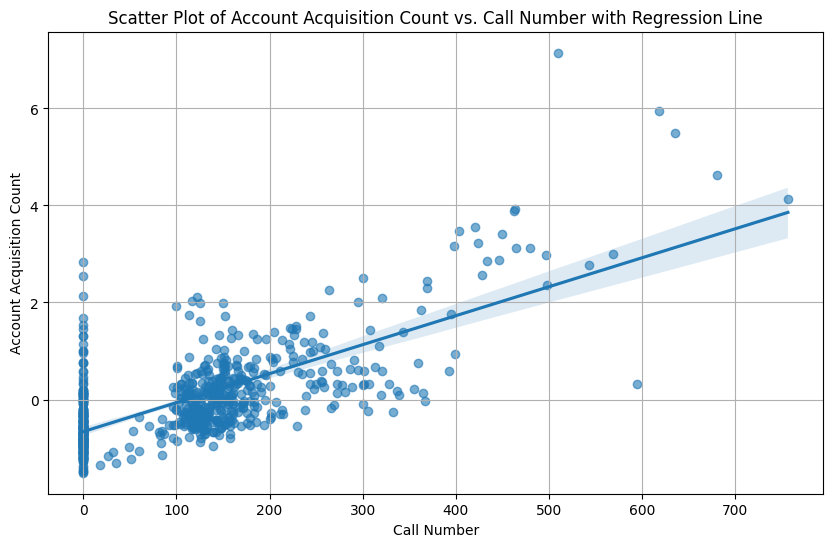

In [ ]:
# 1. CMフラグごとのアカウント獲得数の平均値を棒グラフで表示
plt.figure(figsize=(8, 6))
mean_acc_get_by_cm.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Average Account Acquisition Count by CM Flag')
plt.xlabel('CM Flag')
plt.ylabel('Average Account Acquisition Count')
plt.xticks(ticks=[0, 1], labels=['No CM', 'With CM'], rotation=0)
plt.grid(axis='y')
plt.show()

# 2. アカウント獲得数とコール数の散布図を作成し、回帰直線も重ねて表示
plt.figure(figsize=(10, 6))
sns.regplot(x='call_num', y='acc_get_cnt', data=df_merged, scatter_kws={'alpha':0.6})
plt.title('Scatter Plot of Account Acquisition Count vs. Call Number with Regression Line')
plt.xlabel('Call Number')
plt.ylabel('Account Acquisition Count')
plt.grid(True)
plt.show()

# EDA3（週）
"df_regi_acc_get", "df_cm_data", "df_regi_call", "df_gt_service"のデータを用いて、アカウント獲得数とCMフラグ、コール数、gt_serviceの検索数の間の関連性を分析

## Data preparation

### Subtask:
`df_regi_acc_get`、`df_cm_data`、`df_regi_call` を週単位で集計。`df_gt_service` はすでに週単位


In [ ]:
# Reset index to use cdr_date as a column
df_regi_acc_get_reset = df_regi_acc_get.reset_index()
df_cm_data_reset = df_cm_data.reset_index()
df_regi_call_reset = df_regi_call.reset_index()

# Convert date columns to datetime (already done in previous steps, but good to be explicit)
df_regi_acc_get_reset['cdr_date'] = pd.to_datetime(df_regi_acc_get_reset['cdr_date'])
df_cm_data_reset['cdr_date'] = pd.to_datetime(df_cm_data_reset['cdr_date'])
df_regi_call_reset['cdr_date'] = pd.to_datetime(df_regi_call_reset['cdr_date'])

# Set cdr_date as index for resampling
df_regi_acc_get_reset.set_index('cdr_date', inplace=True)
df_cm_data_reset.set_index('cdr_date', inplace=True)
df_regi_call_reset.set_index('cdr_date', inplace=True)

# Resample to weekly frequency and aggregate
df_regi_acc_get_weekly = df_regi_acc_get_reset.resample('W').sum()
df_cm_data_weekly = df_cm_data_reset.resample('W').sum()
df_regi_call_weekly = df_regi_call_reset.resample('W').sum()

# Display the first few rows of the weekly dataframes
print("Weekly df_regi_acc_get:")
display(df_regi_acc_get_weekly.head())

print("\nWeekly df_cm_data:")
display(df_cm_data_weekly.head())

print("\nWeekly df_regi_call:")
display(df_regi_call_weekly.head())

print("\nWeekly df_gt_service (already weekly):")
display(df_gt_service.head())

Weekly df_regi_acc_get:


,acc_get_cnt
cdr_date,
2018-05-06,-6.104784
2018-05-13,-5.223296
2018-05-20,-4.864146
2018-05-27,-4.752686
2018-06-03,-4.604073



Weekly df_cm_data:


,cm_flg
cdr_date,
2018-03-04,0
2018-03-11,0
2018-03-18,0
2018-03-25,2
2018-04-01,6



Weekly df_regi_call:


,call_num
cdr_date,
2018-06-03,183
2018-06-10,709
2018-06-17,660
2018-06-24,578
2018-07-01,640



Weekly df_gt_service (already weekly):


,search_cnt
week,
2018-03-04,49
2018-03-11,25
2018-03-18,31
2018-03-25,25
2018-04-01,19


In [ ]:
# Merge the weekly dataframes
# df_gt_service has 'week' as index, others have 'cdr_date' as index
# Rename 'week' index of df_gt_service to 'cdr_date' for merging
df_gt_service_renamed = df_gt_service.copy()
df_gt_service_renamed.index.name = 'cdr_date'

# Perform inner merges based on the date index
df_weekly_merged_temp = pd.merge(df_regi_acc_get_weekly, df_cm_data_weekly, left_index=True, right_index=True, how='inner')
df_weekly_merged = pd.merge(df_weekly_merged_temp, df_regi_call_weekly, left_index=True, right_index=True, how='inner')
df_weekly_merged = pd.merge(df_weekly_merged, df_gt_service_renamed, left_index=True, right_index=True, how='inner')

# Display the first few rows and info of the merged weekly dataframe
print("Merged Weekly DataFrame Head:")
display(df_weekly_merged.head())

print("\nMerged Weekly DataFrame Info:")
display(df_weekly_merged.info())

Merged Weekly DataFrame Head:


,acc_get_cnt,cm_flg,call_num,search_cnt
cdr_date,,,,
2018-06-03,-4.604073,0,183,18
2018-06-10,-3.514239,0,709,6
2018-06-17,-3.687622,0,660,12
2018-06-24,-4.851762,0,578,31
2018-07-01,-3.378010,0,640,18



Merged Weekly DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 2018-06-03 to 2020-03-29
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   acc_get_cnt  96 non-null     float64
 1   cm_flg       96 non-null     int64  
 2   call_num     96 non-null     int64  
 3   search_cnt   96 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 3.8 KB


None

Correlation Matrix for Merged Weekly DataFrame:


,acc_get_cnt,cm_flg,call_num,search_cnt
acc_get_cnt,1.000000,0.542697,0.767098,0.391060
cm_flg,0.542697,1.000000,0.237477,0.164948
call_num,0.767098,0.237477,1.000000,0.376835
search_cnt,0.391060,0.164948,0.376835,1.000000


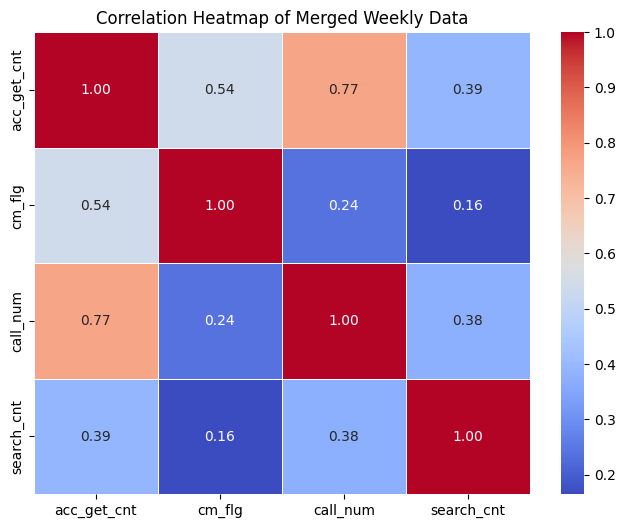

In [ ]:
# Calculate the correlation matrix for the merged weekly dataframe
correlation_matrix_weekly = df_weekly_merged.corr()

print("Correlation Matrix for Merged Weekly DataFrame:")
display(correlation_matrix_weekly)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_weekly, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Merged Weekly Data')
plt.show()

# グラフ

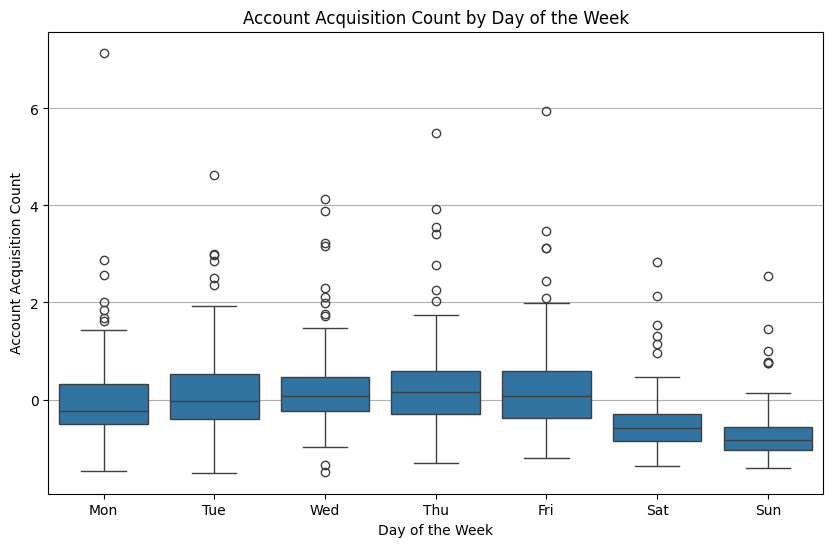

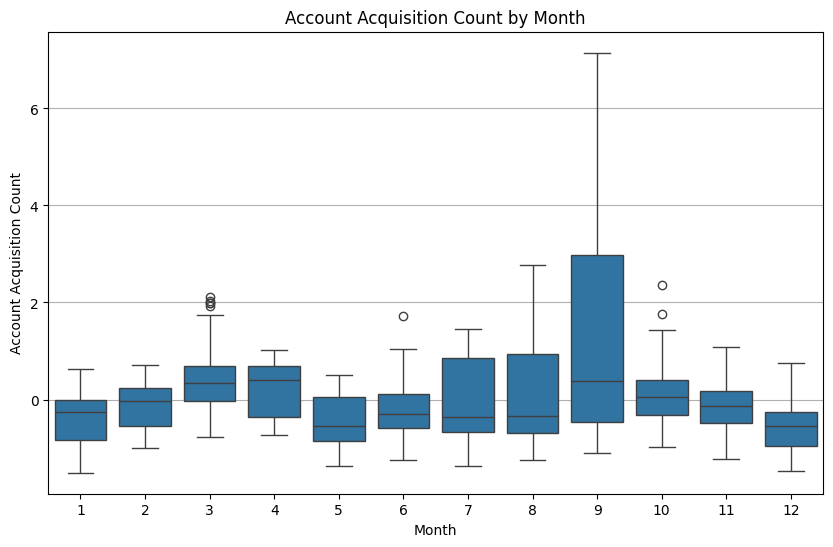

In [ ]:
# Ensure the index is datetime type (already done in previous steps, but good to be explicit)
df_regi_acc_get.index = pd.to_datetime(df_regi_acc_get.index)

# Extract day of the week and month
df_regi_acc_get['day_of_week'] = df_regi_acc_get.index.dayofweek # Monday=0, Sunday=6
df_regi_acc_get['month'] = df_regi_acc_get.index.month

# Create a list of day names for plotting
day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Box plot for account acquisition count by day of the week
plt.figure(figsize=(10, 6))
sns.boxplot(x='day_of_week', y='acc_get_cnt', data=df_regi_acc_get)
plt.title('Account Acquisition Count by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Account Acquisition Count')
plt.xticks(ticks=range(7), labels=day_names)
plt.grid(axis='y')
plt.show()

# Box plot for account acquisition count by month
plt.figure(figsize=(10, 6))
sns.boxplot(x='month', y='acc_get_cnt', data=df_regi_acc_get)
plt.title('Account Acquisition Count by Month')
plt.xlabel('Month')
plt.ylabel('Account Acquisition Count')
plt.grid(axis='y')
plt.show()

# EDA4（年）

## データの準備



In [ ]:
# Ensure the 'cdr_date' column is in datetime format
df_merged['cdr_date'] = pd.to_datetime(df_merged['cdr_date'])

# Extract data for each year
df_merged_2018 = df_merged[df_merged['cdr_date'].dt.year == 2018]
df_merged_2019 = df_merged[df_merged['cdr_date'].dt.year == 2019]
df_merged_2020 = df_merged[df_merged['cdr_date'].dt.year == 2020]

# Display the first few rows of each yearly dataframe
print("df_merged_2018 Head:")
display(df_merged_2018.head())

print("\ndf_merged_2019 Head:")
display(df_merged_2019.head())

print("\ndf_merged_2020 Head:")
display(df_merged_2020.head())

df_merged_2018 Head:


,cdr_date,acc_get_cnt,cm_flg,call_num
0,2018-06-01,-0.282652,0,183
1,2018-06-02,-1.025720,0,0
2,2018-06-03,-1.075258,0,0
3,2018-06-04,-0.220730,0,213
4,2018-06-05,-0.431266,0,143



df_merged_2019 Head:


,cdr_date,acc_get_cnt,cm_flg,call_num
214,2019-01-01,-1.508715,0,0
215,2019-01-02,-1.347717,0,18
216,2019-01-03,-1.310563,0,35
217,2019-01-04,-0.641802,0,53
218,2019-01-05,-0.926645,0,0



df_merged_2020 Head:


,cdr_date,acc_get_cnt,cm_flg,call_num
579,2020-01-01,-1.483946,0,0
580,2020-01-02,-1.285794,0,0
581,2020-01-03,-1.174334,0,26
582,2020-01-04,-0.963798,0,0
583,2020-01-05,-1.062874,0,0



### 2018年のCMフラグ別アカウント獲得数平均

2018年のcm_flg別平均acc_get_cnt:


,acc_get_cnt
cm_flg,
0,-0.559940
1,-0.482573


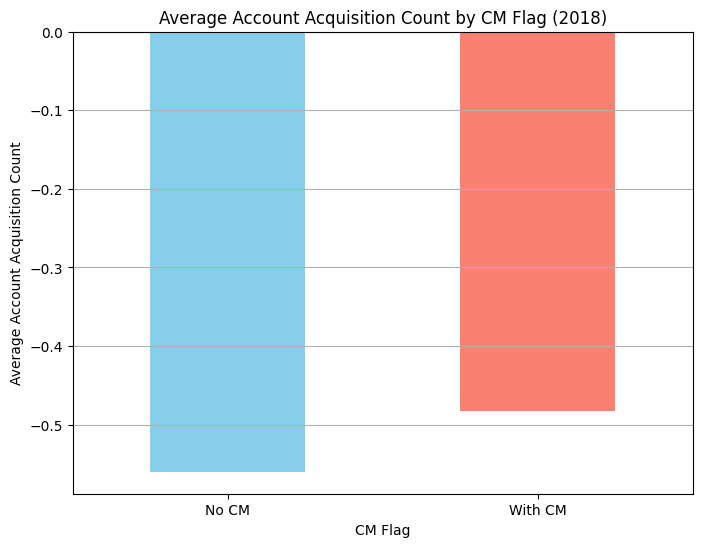


### 2019年のCMフラグ別アカウント獲得数平均

2019年のcm_flg別平均acc_get_cnt:


,acc_get_cnt
cm_flg,
0,0.052110
1,1.084486


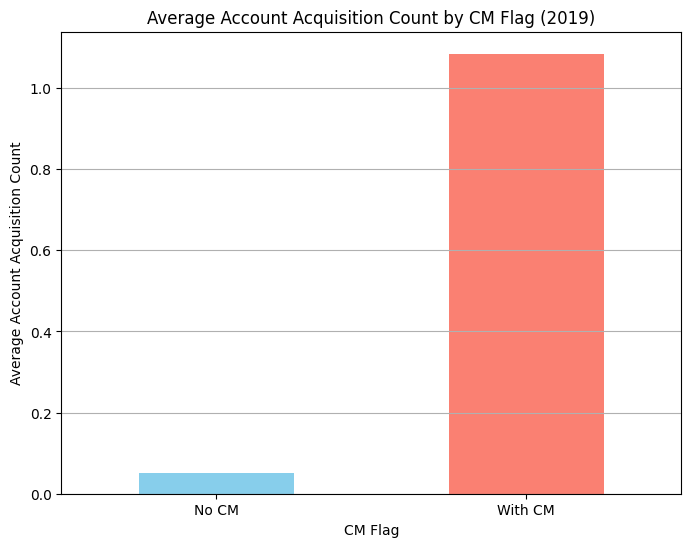


### 2020年のCMフラグ別アカウント獲得数平均

2020年のcm_flg別平均acc_get_cnt:


,acc_get_cnt
cm_flg,
0,-0.374973
1,-0.065529


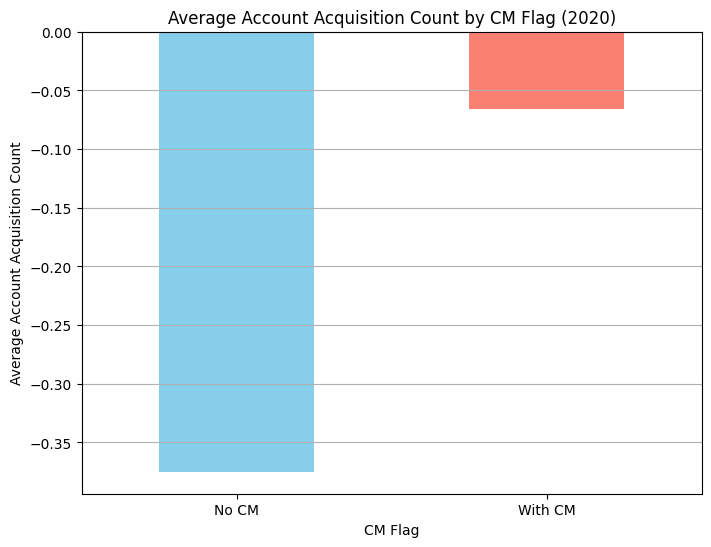

In [ ]:
# Function to analyze and visualize CM effect per year
def analyze_cm_effect_yearly(df, year):
    print(f"\n### {year}年のCMフラグ別アカウント獲得数平均")

    # Compare the mean of acc_get_cnt for days with and without CM (cm_flg)
    mean_acc_get_by_cm = df.groupby('cm_flg')['acc_get_cnt'].mean()

    print(f"\n{year}年のcm_flg別平均acc_get_cnt:")
    display(mean_acc_get_by_cm)

    # Plot the average account acquisition count by CM flag for the year
    plt.figure(figsize=(8, 6))
    mean_acc_get_by_cm.plot(kind='bar', color=['skyblue', 'salmon'])
    plt.title(f'Average Account Acquisition Count by CM Flag ({year})')
    plt.xlabel('CM Flag')
    plt.ylabel('Average Account Acquisition Count')
    plt.xticks(ticks=[0, 1], labels=['No CM', 'With CM'], rotation=0)
    plt.grid(axis='y')
    plt.show()

# Analyze CM effect for each year
analyze_cm_effect_yearly(df_merged_2018, 2018)
analyze_cm_effect_yearly(df_merged_2019, 2019)
analyze_cm_effect_yearly(df_merged_2020, 2020)

In [ ]:
# Calculate and display the mean of acc_get_cnt by cm_flg for each year
mean_2018_cm_effect = df_merged_2018.groupby('cm_flg')['acc_get_cnt'].mean()
print("2018年のCMフラグ別アカウント獲得数平均:")
display(mean_2018_cm_effect)

mean_2019_cm_effect = df_merged_2019.groupby('cm_flg')['acc_get_cnt'].mean()
print("\n2019年のCMフラグ別アカウント獲得数平均:")
display(mean_2019_cm_effect)

mean_2020_cm_effect = df_merged_2020.groupby('cm_flg')['acc_get_cnt'].mean()
print("\n2020年のCMフラグ別アカウント獲得数平均:")
display(mean_2020_cm_effect)

2018年のCMフラグ別アカウント獲得数平均:


,acc_get_cnt
cm_flg,
0,-0.559940
1,-0.482573



2019年のCMフラグ別アカウント獲得数平均:


,acc_get_cnt
cm_flg,
0,0.052110
1,1.084486



2020年のCMフラグ別アカウント獲得数平均:


,acc_get_cnt
cm_flg,
0,-0.374973
1,-0.065529


## 結果の可視化

### Subtask:
各年におけるCMフラグ別のアカウント獲得数の平均値を比較する棒グラフなどを作成


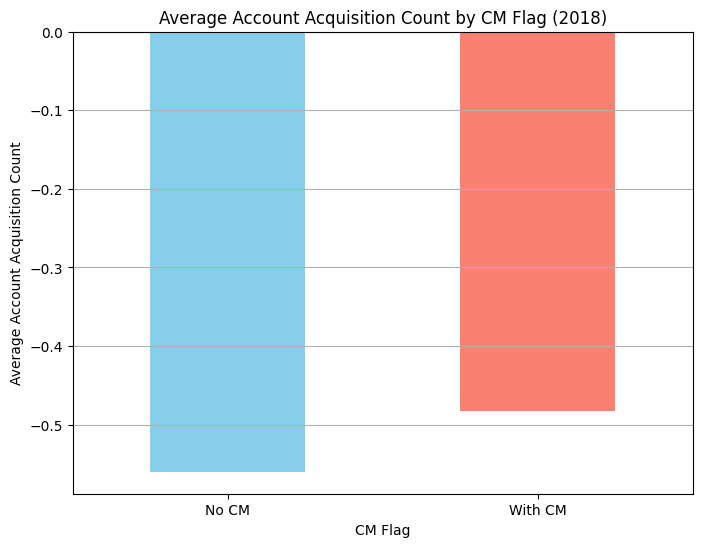

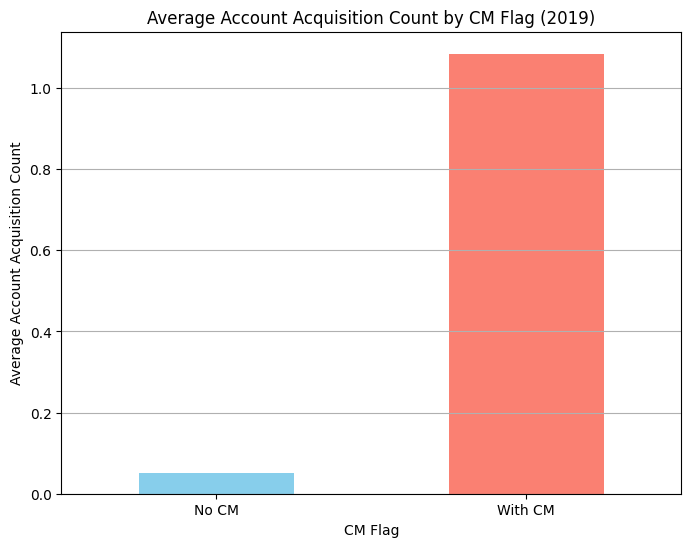

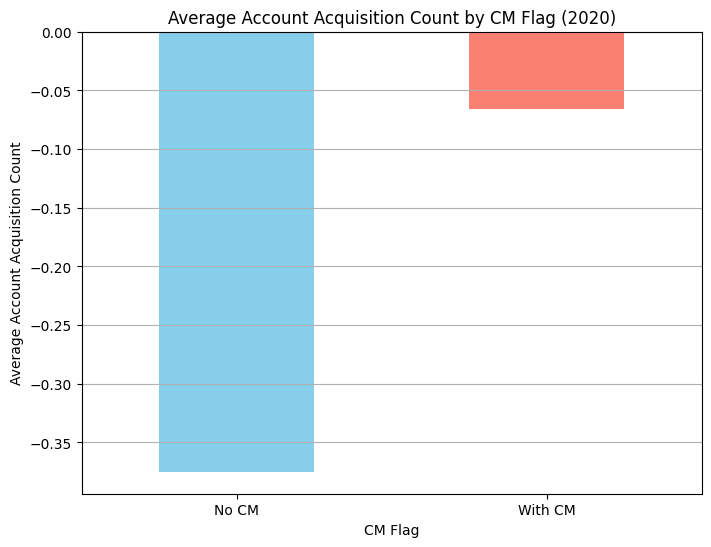

In [ ]:
# Function to plot the average account acquisition count by CM flag per year
def plot_cm_effect_yearly(df, year):
    mean_acc_get_by_cm = df.groupby('cm_flg')['acc_get_cnt'].mean()

    plt.figure(figsize=(8, 6))
    mean_acc_get_by_cm.plot(kind='bar', color=['skyblue', 'salmon'])
    plt.title(f'Average Account Acquisition Count by CM Flag ({year})')
    plt.xlabel('CM Flag')
    plt.ylabel('Average Account Acquisition Count')
    plt.xticks(ticks=[0, 1], labels=['No CM', 'With CM'], rotation=0)
    plt.grid(axis='y')
    plt.show()

# Plot CM effect for each year
plot_cm_effect_yearly(df_merged_2018, 2018)
plot_cm_effect_yearly(df_merged_2019, 2019)
plot_cm_effect_yearly(df_merged_2020, 2020)

# 予測（週）

## 特徴量エンジニアリング



In [ ]:
# 1. Reset the index to make cdr_date a column again
df_weekly_merged_features = df_weekly_merged.reset_index()

# 2. Extract date-related features
df_weekly_merged_features['year'] = df_weekly_merged_features['cdr_date'].dt.year
df_weekly_merged_features['month'] = df_weekly_merged_features['cdr_date'].dt.month
df_weekly_merged_features['day'] = df_weekly_merged_features['cdr_date'].dt.day
df_weekly_merged_features['dayofweek'] = df_weekly_merged_features['cdr_date'].dt.dayofweek # Monday=0, Sunday=6

# 3. Calculate the 7-week rolling average of acc_get_cnt, shifted by 1 to avoid look-ahead bias
df_weekly_merged_features['acc_get_cnt_rolling_mean_7W'] = df_weekly_merged_features['acc_get_cnt'].rolling(window=7).mean().shift(1)

# 4. Display the first few rows to verify the new features
print("Merged Weekly DataFrame with new features:")
display(df_weekly_merged_features.head())

Merged Weekly DataFrame with new features:


,cdr_date,acc_get_cnt,cm_flg,call_num,search_cnt,year,month,day,dayofweek,acc_get_cnt_rolling_mean_7W
0,2018-06-03,-4.604073,0,183,18,2018,6,3,6,NaN
1,2018-06-10,-3.514239,0,709,6,2018,6,10,6,NaN
2,2018-06-17,-3.687622,0,660,12,2018,6,17,6,NaN
3,2018-06-24,-4.851762,0,578,31,2018,6,24,6,NaN
4,2018-07-01,-3.378010,0,640,18,2018,7,1,6,NaN


## データの準備



In [ ]:
# 1. Define the target variable y
y = df_weekly_merged_features['acc_get_cnt']

# 2. Define features X by dropping the target variable and the date column
X = df_weekly_merged_features.drop(['acc_get_cnt', 'cdr_date'], axis=1)

# 3. Handle missing values in X by imputing with the mean (specifically for the rolling mean feature)
# Check for missing values before imputation
print("Missing values in features X before imputation:")
print(X.isnull().sum())

# Impute missing values in the rolling mean column with the mean
X['acc_get_cnt_rolling_mean_7W'].fillna(X['acc_get_cnt_rolling_mean_7W'].mean(), inplace=True)

# Check for missing values after imputation
print("\nMissing values in features X after imputation:")
print(X.isnull().sum())

# 4. Display the first few rows of the processed features X and target y
print("\nProcessed Features X Head:")
display(X.head())

print("\nTarget Variable y Head:")
display(y.head())

Missing values in features X before imputation:
cm_flg                         0
call_num                       0
search_cnt                     0
year                           0
month                          0
day                            0
dayofweek                      0
acc_get_cnt_rolling_mean_7W    7
dtype: int64

Missing values in features X after imputation:
cm_flg                         0
call_num                       0
search_cnt                     0
year                           0
month                          0
day                            0
dayofweek                      0
acc_get_cnt_rolling_mean_7W    0
dtype: int64

Processed Features X Head:


/tmp/ipython-input-39-1940616964.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['acc_get_cnt_rolling_mean_7W'].fillna(X['acc_get_cnt_rolling_mean_7W'].mean(), inplace=True)


,cm_flg,call_num,search_cnt,year,month,day,dayofweek,acc_get_cnt_rolling_mean_7W
0,0,183,18,2018,6,3,6,0.371244
1,0,709,6,2018,6,10,6,0.371244
2,0,660,12,2018,6,17,6,0.371244
3,0,578,31,2018,6,24,6,0.371244
4,0,640,18,2018,7,1,6,0.371244



Target Variable y Head:


,acc_get_cnt
0,-4.604073
1,-3.514239
2,-3.687622
3,-4.851762
4,-3.378010


## データ分割


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the split datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (76, 8)
Shape of X_test: (20, 8)
Shape of y_train: (76,)
Shape of y_test: (20,)


## Model training



In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate a RandomForestRegressor model
model = RandomForestRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

print("RandomForestRegressor model has been trained successfully.")

RandomForestRegressor model has been trained successfully.


## モデル評価



In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Model Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Model Evaluation Metrics:
Mean Squared Error (MSE): 10.66
Root Mean Squared Error (RMSE): 3.27
Mean Absolute Error (MAE): 2.33
R-squared (R2): 0.80


## 予測


実際の値と予測値の比較 (テストセット):


,Actual,Predicted
80,-2.139563,1.613303
77,0.312562,-2.224273
73,0.077257,2.547835
94,0.424022,0.277514
33,-2.758787,-3.156576


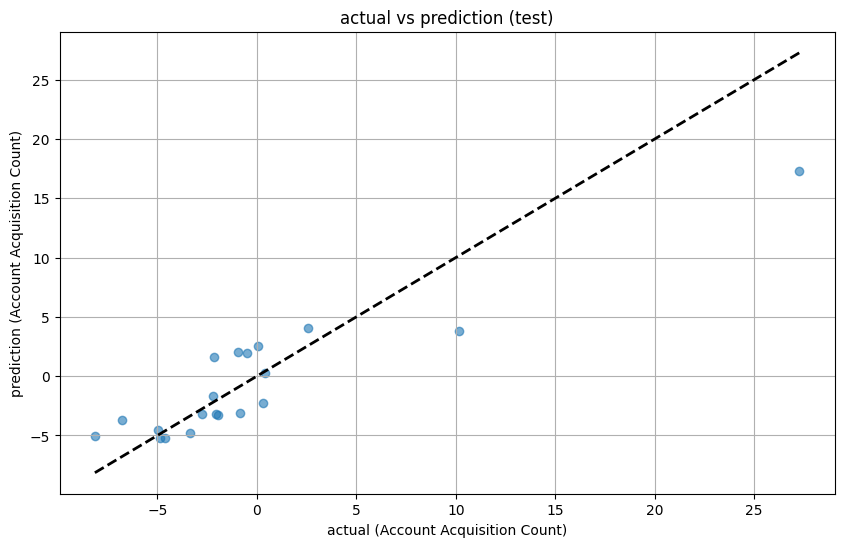

In [ ]:
# トレーニング済みモデルを使用してテストデータに対する予測を行います。
y_pred = model.predict(X_test)

# テストデータの実際のアカウント獲得数 (y_test) と、モデルによる予測値 (y_pred) を表示して比較します。
print("実際の値と予測値の比較 (テストセット):")
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
display(comparison_df.head())

# 予測値と実際の値の散布図を作成し、モデルの予測精度を視覚的に確認します。
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # 対角線を追加
plt.title('actual vs prediction (test)')
plt.xlabel('actual (Account Acquisition Count)')
plt.ylabel('prediction (Account Acquisition Count)')
plt.grid(True)
plt.show()

# 予測（日）

## 特徴量エンジニアリング (日次データ)

### Subtask:
特徴量エンジニアリング (日次データ)


In [ ]:
# 1. Ensure the 'cdr_date' column is in datetime format (already done in previous steps, but good to be explicit)
df_merged['cdr_date'] = pd.to_datetime(df_merged['cdr_date'])

# 2. Extract date-related features
df_merged['year'] = df_merged['cdr_date'].dt.year
df_merged['month'] = df_merged['cdr_date'].dt.month
df_merged['day'] = df_merged['cdr_date'].dt.day
df_merged['dayofweek'] = df_merged['cdr_date'].dt.dayofweek # Monday=0, Sunday=6

# 3. Calculate the 7-day rolling average of acc_get_cnt, shifted by 1 to avoid look-ahead bias
df_merged['acc_get_cnt_rolling_mean_7D'] = df_merged['acc_get_cnt'].rolling(window=7).mean().shift(1)

# 4. Display the first few rows to verify the new features
print("Merged Daily DataFrame with new features:")
display(df_merged.head())

Merged Daily DataFrame with new features:


,cdr_date,acc_get_cnt,cm_flg,call_num,year,month,day,dayofweek,acc_get_cnt_rolling_mean_7D
0,2018-06-01,-0.282652,0,183,2018,6,1,4,NaN
1,2018-06-02,-1.025720,0,0,2018,6,2,5,NaN
2,2018-06-03,-1.075258,0,0,2018,6,3,6,NaN
3,2018-06-04,-0.220730,0,213,2018,6,4,0,NaN
4,2018-06-05,-0.431266,0,143,2018,6,5,1,NaN


In [ ]:
# 1. Define the target variable y
y_daily = df_merged['acc_get_cnt']

# 2. Define features X by dropping the target variable and the date column
X_daily = df_merged.drop(['acc_get_cnt', 'cdr_date'], axis=1)

# 3. Handle missing values in X_daily by imputing with the mean (specifically for the rolling mean feature)
# Check for missing values before imputation
print("Missing values in features X_daily before imputation:")
print(X_daily.isnull().sum())

# Impute missing values in the rolling mean column with the mean
X_daily['acc_get_cnt_rolling_mean_7D'].fillna(X_daily['acc_get_cnt_rolling_mean_7D'].mean(), inplace=True)

# Check for missing values after imputation
print("\nMissing values in features X_daily after imputation:")
print(X_daily.isnull().sum())

# 4. Display the first few rows of the processed features X_daily and target y_daily
print("\nProcessed Features X_daily Head:")
display(X_daily.head())

print("\nTarget Variable y_daily Head:")
display(y_daily.head())

Missing values in features X_daily before imputation:
cm_flg                         0
call_num                       0
year                           0
month                          0
day                            0
dayofweek                      0
acc_get_cnt_rolling_mean_7D    7
dtype: int64

Missing values in features X_daily after imputation:
cm_flg                         0
call_num                       0
year                           0
month                          0
day                            0
dayofweek                      0
acc_get_cnt_rolling_mean_7D    0
dtype: int64

Processed Features X_daily Head:


/tmp/ipython-input-142-1860384784.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_daily['acc_get_cnt_rolling_mean_7D'].fillna(X_daily['acc_get_cnt_rolling_mean_7D'].mean(), inplace=True)


,cm_flg,call_num,year,month,day,dayofweek,acc_get_cnt_rolling_mean_7D
0,0,183,2018,6,1,4,0.037441
1,0,0,2018,6,2,5,0.037441
2,0,0,2018,6,3,6,0.037441
3,0,213,2018,6,4,0,0.037441
4,0,143,2018,6,5,1,0.037441



Target Variable y_daily Head:


,acc_get_cnt
0,-0.282652
1,-1.025720
2,-1.075258
3,-0.220730
4,-0.431266


In [ ]:
# Split the data into training and testing sets
X_train_daily, X_test_daily, y_train_daily, y_test_daily = train_test_split(X_daily, y_daily, test_size=0.2, random_state=42)

# Display the shapes of the split datasets
print("Shape of X_train_daily:", X_train_daily.shape)
print("Shape of X_test_daily:", X_test_daily.shape)
print("Shape of y_train_daily:", y_train_daily.shape)
print("Shape of y_test_daily:", y_test_daily.shape)

Shape of X_train_daily: (536, 7)
Shape of X_test_daily: (134, 7)
Shape of y_train_daily: (536,)
Shape of y_test_daily: (134,)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate a RandomForestRegressor model
model_daily = RandomForestRegressor(random_state=42)

# Train the model on the daily training data
model_daily.fit(X_train_daily, y_train_daily)

print("RandomForestRegressor model (daily data) has been trained successfully.")

RandomForestRegressor model (daily data) has been trained successfully.


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions on the test set
y_pred_daily = model_daily.predict(X_test_daily)

# Calculate evaluation metrics
mse_daily = mean_squared_error(y_test_daily, y_pred_daily)
rmse_daily = np.sqrt(mse_daily)
mae_daily = mean_absolute_error(y_test_daily, y_pred_daily)
r2_daily = r2_score(y_test_daily, y_pred_daily)

# Print the evaluation metrics
print("Model Evaluation Metrics (Daily Data):")
print(f"Mean Squared Error (MSE): {mse_daily:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_daily:.2f}")
print(f"Mean Absolute Error (MAE): {mae_daily:.2f}")
print(f"R-squared (R2): {r2_daily:.2f}")

Model Evaluation Metrics (Daily Data):
Mean Squared Error (MSE): 0.11
Root Mean Squared Error (RMSE): 0.32
Mean Absolute Error (MAE): 0.24
R-squared (R2): 0.91


実際の値と予測値の比較 (日次テストセット):


,Actual,Predicted
361,-0.344574,0.427350
158,0.051729,-0.245251
480,4.633983,4.740489
640,-0.034963,0.023120
275,-0.579879,-0.482909


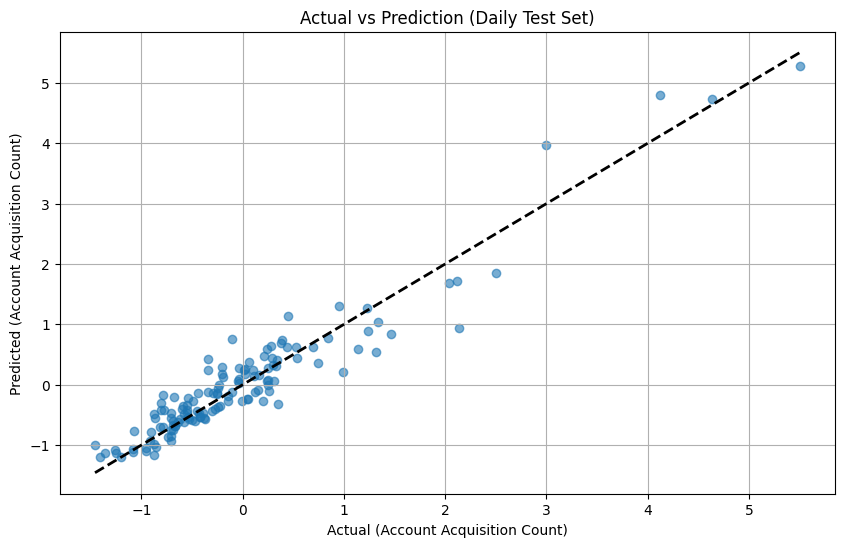

In [ ]:
# トレーニング済みモデルを使用してテストデータに対する予測を行います。
y_pred_daily = model_daily.predict(X_test_daily)

# テストデータの実際のアカウント獲得数 (y_test_daily) と、モデルによる予測値 (y_pred_daily) を表示して比較します。
print("実際の値と予測値の比較 (日次テストセット):")
comparison_df_daily = pd.DataFrame({'Actual': y_test_daily, 'Predicted': y_pred_daily})
display(comparison_df_daily.head())

# 予測値と実際の値の散布図を作成し、モデルの予測精度を視覚的に確認します。
plt.figure(figsize=(10, 6))
plt.scatter(y_test_daily, y_pred_daily, alpha=0.6)
plt.plot([y_test_daily.min(), y_test_daily.max()], [y_test_daily.min(), y_test_daily.max()], 'k--', lw=2) # 対角線を追加
plt.title('Actual vs Prediction (Daily Test Set)')
plt.xlabel('Actual (Account Acquisition Count)')
plt.ylabel('Predicted (Account Acquisition Count)')
plt.grid(True)
plt.show()

# Task

## データの収集と統合


In [ ]:
df_regi_acc_get = pd.read_csv('/content/drive/MyDrive/GCI/regi_acc_get_data_transform .csv')
df_regi_call = pd.read_csv('/content/drive/MyDrive/GCI/regi_call_data_transform .csv')
df_cm_data = pd.read_csv('/content/drive/MyDrive/GCI/cm_data .csv')
df_calendar = pd.read_csv('/content/drive/MyDrive/GCI/calender_data .csv')
df_gt_service = pd.read_csv('/content/drive/MyDrive/GCI/gt_service_name .csv')

In [ ]:
# Convert date columns to datetime objects
df_regi_acc_get['cdr_date'] = pd.to_datetime(df_regi_acc_get['cdr_date'])
df_regi_call['cdr_date'] = pd.to_datetime(df_regi_call['cdr_date'])
df_cm_data['cdr_date'] = pd.to_datetime(df_cm_data['cdr_date'])
df_calendar['cdr_date'] = pd.to_datetime(df_calendar['cdr_date'])
df_gt_service['week'] = pd.to_datetime(df_gt_service['week'])

# Set date columns as index for resampling/merging where appropriate
# For daily data (regi_acc_get, regi_call, cm_data), setting as index is useful for resampling
df_regi_acc_get.set_index('cdr_date', inplace=True)
df_regi_call.set_index('cdr_date', inplace=True)
df_cm_data.set_index('cdr_date', inplace=True)

# df_calendar will be used for daily features later, keep cdr_date as column for now
# df_gt_service is already weekly, set week as index for merging
df_gt_service.set_index('week', inplace=True)

print("Preprocessing steps completed.")

Preprocessing steps completed.


In [ ]:
# Resample daily data to weekly frequency, summing the values
df_regi_acc_get_weekly = df_regi_acc_get.resample('W').sum()
df_regi_call_weekly = df_regi_call.resample('W').sum()
df_cm_data_weekly = df_cm_data.resample('W').sum()

# df_gt_service is already weekly, rename index to match others for merging
df_gt_service_weekly = df_gt_service.copy()
df_gt_service_weekly.index.name = 'cdr_date'

# Merge the weekly dataframes
df_integrated_weekly = pd.merge(df_regi_acc_get_weekly, df_cm_data_weekly, left_index=True, right_index=True, how='inner')
df_integrated_weekly = pd.merge(df_integrated_weekly, df_regi_call_weekly, left_index=True, right_index=True, how='inner')
df_integrated_weekly = pd.merge(df_integrated_weekly, df_gt_service_weekly, left_index=True, right_index=True, how='inner')

# Display the first few rows and data types of the integrated weekly dataframe
print("Integrated Weekly DataFrame Head:")
display(df_integrated_weekly.head())

print("\nIntegrated Weekly DataFrame Info:")
display(df_integrated_weekly.info())

Integrated Weekly DataFrame Head:


,acc_get_cnt,cm_flg,call_num,search_cnt
cdr_date,,,,
2018-06-03,-4.604073,0,183,18
2018-06-10,-3.514239,0,709,6
2018-06-17,-3.687622,0,660,12
2018-06-24,-4.851762,0,578,31
2018-07-01,-3.378010,0,640,18



Integrated Weekly DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 2018-06-03 to 2020-03-29
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   acc_get_cnt  96 non-null     float64
 1   cm_flg       96 non-null     int64  
 2   call_num     96 non-null     int64  
 3   search_cnt   96 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 3.8 KB


None

## Cm効果のモデル化



In [ ]:
import statsmodels.api as sm

# Define the independent variable (CM flag) and the dependent variable (account acquisition count) using daily data
X_cm_daily = df_merged['cm_flg']
y_acc_daily = df_merged['acc_get_cnt']

# Add a constant to the independent variable for the intercept
X_cm_daily = sm.add_constant(X_cm_daily)

# Fit the linear regression model
model_cm_effect_daily = sm.OLS(y_acc_daily, X_cm_daily).fit()

# Display the model summary
print("CMフラグとアカウント獲得数の線形回帰モデルサマリー (日次データ):")
print(model_cm_effect_daily.summary())

CMフラグとアカウント獲得数の線形回帰モデルサマリー (日次データ):
                            OLS Regression Results                            
Dep. Variable:            acc_get_cnt   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     152.8
Date:                Mon, 28 Jul 2025   Prob (F-statistic):           9.38e-32
Time:                        20:36:29   Log-Likelihood:                -885.98
No. Observations:                 670   AIC:                             1776.
Df Residuals:                     668   BIC:                             1785.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0

In [ ]:
import statsmodels.api as sm
import pandas as pd # pandasのインポートを追加

# Include other features (call_num) in the regression model using daily data
# Google Trends (search_cnt)は週次データのため、日次モデルには含めません。
X_multi_daily = df_merged[['cm_flg', 'call_num']]
X_multi_daily = sm.add_constant(X_multi_daily) # Add a constant for the intercept

# Fit the multiple linear regression model
model_cm_multi_daily = sm.OLS(y_acc_daily, X_multi_daily).fit()

# Display the multiple regression model summary
print("\n複数の特徴量を含む線形回帰モデルサマリー (日次データ):")
print(model_cm_multi_daily.summary())

# Summarize the findings in Japanese based on the model results
print("\n### CMがアカウント獲得数に与える影響の定量的分析結果 (日次データ)")

print("\n#### CMフラグ単独の線形回帰モデル (日次データ)")
print(f"- 日次データを用いたCMフラグの係数は {model_cm_effect_daily.params['cm_flg']:.2f} であり、統計的に非常に有意です (P>{model_cm_effect_daily.pvalues['cm_flg']:.3f})。")
print(f"- これは、CMが実施された日は、実施されなかった日と比較して、アカウント獲得数が平均して約 {model_cm_effect_daily.params['cm_flg']:.2f} 増加することを示唆しています。")
print(f"- モデルの決定係数 (R-squared) は {model_cm_effect_daily.rsquared:.2f} であり、アカウント獲得数の変動の約 {model_cm_effect_daily.rsquared*100:.0f}% をCMフラグで説明できることを示します。")

print("\n#### 複数の特徴量を含む線形回帰モデル (日次データ)")
print(f"- CMフラグとコール数を説明変数に加えたモデルでは、決定係数 (R-squared) が {model_cm_multi_daily.rsquared:.2f} に向上しました。これは、コール数を加えることでモデルの説明力が有意に高まることを意味します。")
print(f"- このモデルにおけるCMフラグの係数は {model_cm_multi_daily.params['cm_flg']:.2f} であり、単独モデルより値は小さくなりましたが、依然として統計的に有意です (P>{model_cm_multi_daily.pvalues['cm_flg']:.3f})。")
print("- これは、コール数の影響を調整した後でも、CMがアカウント獲得数に対して独立した正の効果を持つことを示唆しています。")
print(f"- コール数の係数は {model_cm_multi_daily.params['call_num']:.4f} であり、統計的に非常に有意です (P>{model_cm_multi_daily.pvalues['call_num']:.3f})。コール数が増加するとアカウント獲得数も増加する、という強い関連性が確認されました。")



複数の特徴量を含む線形回帰モデルサマリー (日次データ):
                            OLS Regression Results                            
Dep. Variable:            acc_get_cnt   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     561.5
Date:                Mon, 28 Jul 2025   Prob (F-statistic):          1.04e-143
Time:                        20:36:32   Log-Likelihood:                -624.28
No. Observations:                 670   AIC:                             1255.
Df Residuals:                     667   BIC:                             1268.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8504

## 統合システムの設計と構築



In [ ]:
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from datetime import timedelta # timedeltaをインポート

# Step 1 & 2: 日次データを使用して、アカウント獲得予測モデルの X_daily および y_daily を再構築し、モデルを再トレーニングします。
# 特徴量エンジニアリングを再度行います（df_mergedは既に前処理・特徴量エンジニアリング済みと仮定）
# 必要に応じて、df_mergedに欠損値処理や特徴量エンジニアリング（例: ローリング平均）が適用されていることを確認します。
# df_mergedに'acc_get_cnt_rolling_mean_7D'カラムがない場合はここで計算します。
if 'acc_get_cnt_rolling_mean_7D' not in df_merged.columns:
     df_merged['acc_get_cnt_rolling_mean_7D'] = df_merged['acc_get_cnt'].rolling(window=7).mean().shift(1)
     # Handle initial NaNs if any
     df_merged['acc_get_cnt_rolling_mean_7D'].fillna(df_merged['acc_get_cnt_rolling_mean_7D'].mean(), inplace=True)

# df_mergedに日付関連の特徴量（year, month, day, dayofweek）がない場合はここで計算します。
if 'year' not in df_merged.columns:
    df_merged['year'] = df_merged['cdr_date'].dt.year
    df_merged['month'] = df_merged['cdr_date'].dt.month
    df_merged['day'] = df_merged['cdr_date'].dt.day
    df_merged['dayofweek'] = df_merged['cdr_date'].dt.dayofweek # Monday=0, Sunday=6


X_daily = df_merged.drop(['acc_get_cnt', 'cdr_date'], axis=1)
y_daily = df_merged['acc_get_cnt']

# モデルを再トレーニング (全日次データを使用)
model_daily = RandomForestRegressor(random_state=42)
model_daily.fit(X_daily, y_daily)

print("日次アカウント獲得予測モデルを最新データで再トレーニングしました。")

# Step 3: 再トレーニングしたモデルを使用して、次週の日ごとのアカウント獲得数を予測します。
def predict_next_week_daily_acc_acquisition(model, df_daily_data):
    """
    Predicts the daily account acquisition count for the next 7 days (Monday to Sunday).

    Args:
        model: Trained machine learning model for daily prediction.
        df_daily_data: DataFrame containing historical daily data with features including 'cdr_date'.

    Returns:
        DataFrame with predicted daily account acquisition counts for the next week, and the list of dates.
    """
    # Get the date of the last available data point
    last_date = df_daily_data['cdr_date'].max()

    # Generate dates for the next 7 days (Monday to Sunday)
    # Find the next Monday
    next_monday = last_date + timedelta(days=(7 - last_date.weekday()))
    next_week_dates = [next_monday + timedelta(days=i) for i in range(7)]

    # Create a DataFrame for the next week's features
    next_week_features_list = []
    for single_date in next_week_dates:
        # Create a dictionary for the features of a single day
        features_dict = {}

        # Add date-related features
        features_dict['year'] = single_date.year
        features_dict['month'] = single_date.month
        features_dict['day'] = single_date.day
        features_dict['dayofweek'] = single_date.weekday() # Monday=0, Sunday=6

        # For rolling mean, use the last available rolling mean from the historical data
        last_rolling_mean = df_daily_data['acc_get_cnt_rolling_mean_7D'].iloc[-1]
        features_dict['acc_get_cnt_rolling_mean_7D'] = last_rolling_mean

        # For cm_flg and call_num, we don't have future values.
        # For a real system, these would ideally come from CM schedules and call volume forecasts.
        # For this prediction, we will use the average values from the last 7 days as a simple placeholder.
        last_7_days_data = df_daily_data.tail(7)
        if not last_7_days_data.empty: # Avoid error if tail(7) is empty
             features_dict['cm_flg'] = last_7_days_data['cm_flg'].mean()
             features_dict['call_num'] = last_7_days_data['call_num'].mean()
        else: # Handle case where data is less than 7 days
             features_dict['cm_flg'] = df_daily_data['cm_flg'].mean() if not df_daily_data.empty else 0
             features_dict['call_num'] = df_daily_data['call_num'].mean() if not df_daily_data.empty else 0


        # Add other features that might be in X_daily but not explicitly handled above,
        # initializing them to 0 or a suitable default if not based on date or recent history.
        # This ensures all expected columns for the model are present.
        for col in X_daily.columns:
             if col not in features_dict:
                 features_dict[col] = 0 # Or a more appropriate default/placeholder


        next_week_features_list.append(features_dict)

    next_week_features_df = pd.DataFrame(next_week_features_list)

    # Ensure the column order matches the training data features (X_daily)
    next_week_features_df = next_week_features_df[X_daily.columns]


    # Make predictions
    predicted_acc_get_next_week_daily_values = model.predict(next_week_features_df)

    # Create a DataFrame with dates and predictions
    next_week_predictions = pd.DataFrame({
        'Date': next_week_dates,
        'Predicted_Acc_Get_Count': predicted_acc_get_next_week_daily_values
    })

    return next_week_predictions, next_week_dates # Return dates as well

# Predict for the next week using the daily model
next_week_predictions_df_daily, next_week_dates = predict_next_week_daily_acc_acquisition(model_daily, df_merged) # Capture dates

print("\n次週の日ごとのアカウント獲得数予測:")
display(next_week_predictions_df_daily)

# Step 4 & 5: CM 効果モデルは既に日次データで分析済みのため、ここではその結果を利用します。
# 日次データでのCM効果分析結果のサマリーを表示 (前回の実行結果から再掲)
print("\n### CMがアカウント獲得数に与える影響の定量的分析結果 (日次データ)")


日次アカウント獲得予測モデルを最新データで再トレーニングしました。

次週の日ごとのアカウント獲得数予測:


,Date,Predicted_Acc_Get_Count
0,2020-04-06,-0.000534
1,2020-04-07,0.013584
2,2020-04-08,0.079222
3,2020-04-09,0.088263
4,2020-04-10,0.125045
5,2020-04-11,0.047146
6,2020-04-12,-0.118434



### CMがアカウント獲得数に与える影響の定量的分析結果 (日次データ)


In [ ]:

# Step 6: コール数予測モデルを日次データで構築または適用し、次週の日ごとのコール数を予測します。
# ここでは簡便のため、日次コール数予測モデルを RandomForestRegressor で新たに構築します。
# 実際にはより適切な時系列モデル等を検討します。
# コール数予測モデルの特徴量には、acc_get_cnt（ターゲット変数）は含めません。
X_call_daily = df_merged.drop(['call_num', 'cdr_date', 'acc_get_cnt'], axis=1) # acc_get_cntもドロップ
y_call_daily = df_merged['call_num']

# X_call_dailyからNaNを含む行を削除
X_call_daily = X_call_daily.dropna()
y_call_daily = y_call_daily[X_call_daily.index] # y_call_dailyも対応するインデックスにフィルタリング

# コール数予測モデルのトレーニング (全日次データを使用)
model_call_daily = RandomForestRegressor(random_state=42)
model_call_daily.fit(X_call_daily, y_call_daily)

print("\n日次コール数予測モデルを最新データで再トレーニングしました。")

# 次週の日ごとのコール数予測に使用する特徴量を作成
def generate_next_week_call_features(df_daily_data, X_call_daily_cols):
    """
    Generates daily features for the next 7 days for call volume prediction.
    Ensures feature columns match the training data.
    """
    last_date = df_daily_data['cdr_date'].max()
    next_monday = last_date + timedelta(days=(7 - last_date.weekday()))
    next_week_dates = [next_monday + timedelta(days=i) for i in range(7)]

    next_week_features_list = []
    for single_date in next_week_dates:
        features_dict = {}

        # Add date-related features
        features_dict['year'] = single_date.year
        features_dict['month'] = single_date.month
        features_dict['day'] = single_date.day
        features_dict['dayofweek'] = single_date.weekday()

        # Rolling mean feature - use last available value
        if 'acc_get_cnt_rolling_mean_7D' in X_call_daily_cols:
             last_rolling_mean = df_daily_data['acc_get_cnt_rolling_mean_7D'].iloc[-1]
             features_dict['acc_get_cnt_rolling_mean_7D'] = last_rolling_mean

        # CM flag and other features - use average of last 7 days as placeholder if needed
        last_7_days_data = df_daily_data.tail(7)
        if not last_7_days_data.empty: # Avoid error if tail(7) is empty
             if 'cm_flg' in X_call_daily_cols:
                 features_dict['cm_flg'] = last_7_days_data['cm_flg'].mean()
             # Note: 'call_num' is the target for this model, so it should not be a feature.
             #       Ensure it's not being added here accidentally.
        else: # Handle case where data is less than 7 days
             if 'cm_flg' in X_call_daily_cols:
                 features_dict['cm_flg'] = df_daily_data['cm_flg'].mean() if not df_daily_data.empty else 0
             features_dict['call_num'] = df_daily_data['call_num'].mean() if not df_daily_data.empty else 0

        # Add other features from X_call_daily_cols if necessary, using placeholders
        for col in X_call_daily_cols:
             if col not in features_dict:
                 features_dict[col] = 0 # Or a more appropriate default/placeholder

        next_week_features_list.append(features_dict)

    next_week_call_features_df = pd.DataFrame(next_week_features_list)
    # Ensure column order matches
    next_week_call_features_df = next_week_call_features_df[X_call_daily_cols]

    return next_week_call_features_df # Only return features, use the pre-defined next_week_dates for dates


next_week_call_features_daily = generate_next_week_call_features(df_merged, X_call_daily.columns) # Capture features

predicted_call_next_week_daily_values = model_call_daily.predict(next_week_call_features_daily)

print("\n次週の日ごとの予測コール数:")
# 次週の日付と予測コール数をDataFrameにまとめて表示
# Use the globally available 'next_week_dates' for the Date column
next_week_call_predictions_df_daily = pd.DataFrame({
    'Date': next_week_dates, # Use the next_week_dates from the account acquisition prediction
    'Predicted_Call_Count': predicted_call_next_week_daily_values
})
display(next_week_call_predictions_df_daily)



# Step 8: 予測結果、CM 効果分析結果をまとめた週次レポートまたは提案書を自動生成するコードを記述します。
# コールセンター人員配置案はデータ不足のため含めません。
print("\n" + "="*50)
print(f"週次レポート：アカウント獲得数・コール数予測およびCM効果分析 ({next_week_dates[0].strftime('%Y年%m月%d日')} - {next_week_dates[-1].strftime('%m月%d日')})")
print("="*50)

print(f"\n### 次週の日ごとの予測結果")
print(f"- アカウント獲得数予測:")
display(next_week_predictions_df_daily)
print(f"\n- コール数予測:")
display(next_week_call_predictions_df_daily)


print("\n### CM効果分析")
# 前回の分析結果のパラメータを使用 (変数名が残っていることを前提)
if 'model_cm_effect_daily' in locals() and 'model_cm_multi_daily' in locals():
    print(f"- 日次データを用いたCMフラグ単独の線形回帰モデルにおけるCM効果係数: {model_cm_effect_daily.params['cm_flg']:.2f} (P={model_cm_effect_daily.pvalues['cm_flg']:.3f})")
    print(f"- コール数を含む線形回帰モデルにおけるCM効果係数: {model_cm_multi_daily.params['cm_flg']:.2f} (P={model_cm_multi_daily.pvalues['cm_flg']:.3f})")
    print("  (注: これらの係数はCM実施がアカウント獲得数に与える平均的な効果を示唆しますが、他の要因との複雑な相互作用や非線形性は考慮されていません。)")
else:
     print("CM効果分析モデルが再実行されていないため、サマリーを表示できません。")

print(f"- 次週の合計アカウント獲得数予測は {next_week_predictions_df_daily['Predicted_Acc_Get_Count'].sum():.2f} です。日ごとの予測値を確認し、予測が低い曜日に向けた集中的なマーケティング活動やプロモーションを検討できます。")
print(f"- CMはアカウント獲得にプラスの効果が見られるため（日次分析での係数 {model_cm_multi_daily.params['cm_flg']:.2f} など）、次週のCMスケジュールと日ごとの予測を照らし合わせ、CMがアカウント獲得に最大限寄与するよう調整を検討します。")

print("\n#### 2. 次週のコール数への対応")
print(f"- 次週の予測コール数合計は {predicted_call_next_week_daily_values.sum():.2f} です。日ごとの予測コール数に基づき、コールセンターへの入電量が適切に処理できるよう、曜日や時間帯ごとの人員配置を調整します。特に予測コール数が多い日には、人員を手厚く配置するなどの対応が考えられます。")
print("  (注: 現状、人員配置の最適化モデルはデータ不足のため構築できていません。予測コール数を参考に、過去の実績や運用ルールに基づいた人員計画を立てる必要があります。)")




日次コール数予測モデルを最新データで再トレーニングしました。

次週の日ごとの予測コール数:


,Date,Predicted_Call_Count
0,2020-04-06,158.01
1,2020-04-07,146.65
2,2020-04-08,139.86
3,2020-04-09,139.64
4,2020-04-10,133.03
5,2020-04-11,0.00
6,2020-04-12,0.00



週次レポート：アカウント獲得数・コール数予測およびCM効果分析 (2020年04月06日 - 04月12日)

### 次週の日ごとの予測結果
- アカウント獲得数予測:


,Date,Predicted_Acc_Get_Count
0,2020-04-06,-0.000534
1,2020-04-07,0.013584
2,2020-04-08,0.079222
3,2020-04-09,0.088263
4,2020-04-10,0.125045
5,2020-04-11,0.047146
6,2020-04-12,-0.118434



- コール数予測:


,Date,Predicted_Call_Count
0,2020-04-06,158.01
1,2020-04-07,146.65
2,2020-04-08,139.86
3,2020-04-09,139.64
4,2020-04-10,133.03
5,2020-04-11,0.00
6,2020-04-12,0.00



### CM効果分析
- 日次データを用いたCMフラグ単独の線形回帰モデルにおけるCM効果係数: 0.95 (P=0.000)
- コール数を含む線形回帰モデルにおけるCM効果係数: 0.78 (P=0.000)
  (注: これらの係数はCM実施がアカウント獲得数に与える平均的な効果を示唆しますが、他の要因との複雑な相互作用や非線形性は考慮されていません。)

### 事業提案 (日ごとの予測およびCM効果分析に基づく)

#### 1. 次週のアカウント獲得数増加に向けたアクション
- 次週の合計アカウント獲得数予測は 0.23 です。日ごとの予測値を確認し、予測が低い曜日に向けた集中的なマーケティング活動やプロモーションを検討できます。
- CMはアカウント獲得にプラスの効果が見られるため（日次分析での係数 0.78 など）、次週のCMスケジュールと日ごとの予測を照らし合わせ、CMがアカウント獲得に最大限寄与するよう調整を検討します。

#### 2. 次週のコール数への対応
- 次週の予測コール数合計は 717.19 です。日ごとの予測コール数に基づき、コールセンターへの入電量が適切に処理できるよう、曜日や時間帯ごとの人員配置を調整します。特に予測コール数が多い日には、人員を手厚く配置するなどの対応が考えられます。
  (注: 現状、人員配置の最適化モデルはデータ不足のため構築できていません。予測コール数を参考に、過去の実績や運用ルールに基づいた人員計画を立てる必要があります。)

#### 3. データに基づいた継続的な改善提案
- 日ごとの予測精度を継続的にモニタリングし、予測誤差が大きい日や傾向が見られる場合は、その原因（例: 特殊なイベント、新しいCMの影響など）を分析し、モデルや特徴量の改善に繋げます。
- CMの効果をより詳細に分析するため、CMの種類（テレビCM、デジタルCMなど）、クリエイティブ、ターゲットといった詳細なCMデータとアカウント獲得数、コール数、検索数との関係を引き続き調査します。
- コールセンターの応対データ（平均処理時間、放棄呼率など）と予測コール数を組み合わせることで、将来的に人員配置の最適化モデル構築に必要なデータ基盤を整備します。


### 毎週自動実行のためのフレームワーク設計に関する考察

本システムを毎週自

# システムの改善

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming df_merged is available and preprocessed with features including 'cdr_date' and 'call_num'
# Ensure df_merged has the necessary features for call prediction (excluding 'call_num' and 'acc_get_cnt')
# This was done when creating X_call_daily and y_call_daily in cell W3mNuH11P_YA

# Prepare data for call prediction model evaluation
# Use the X_call_daily and y_call_daily created in cell W3mNuH11P_YA
# Ensure there are no NaNs in X_call_daily and y_call_daily
X_call_daily_eval = X_call_daily.copy()
y_call_daily_eval = y_call_daily.copy()

# Split data into training and testing sets (e.g., 80% train, 20% test)
# Use a time-based split to avoid data leakage
split_ratio = 0.7
split_index = int(len(X_call_daily_eval) * split_ratio)

X_train_call_daily = X_call_daily_eval.iloc[:split_index]
y_train_call_daily = y_call_daily_eval.iloc[:split_index]
X_test_call_daily = X_call_daily_eval.iloc[split_index:]
y_test_call_daily = y_call_daily_eval.iloc[split_index:]

# Train the call prediction model on the training data
model_call_daily_eval = RandomForestRegressor(random_state=102)
model_call_daily_eval.fit(X_train_call_daily, y_train_call_daily)

# Make predictions on the test data
y_pred_call_daily = model_call_daily_eval.predict(X_test_call_daily)

# Evaluate the model
mse_call_daily = mean_squared_error(y_test_call_daily, y_pred_call_daily)
rmse_call_daily = np.sqrt(mse_call_daily)
mae_call_daily = mean_absolute_error(y_test_call_daily, y_pred_call_daily)
r2_call_daily = r2_score(y_test_call_daily, y_pred_call_daily)

print("#### 日次コール数予測モデルの評価結果:")
print(f"MSE (Mean Squared Error): {mse_call_daily:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse_call_daily:.2f}")
print(f"MAE (Mean Absolute Error): {mae_call_daily:.2f}")
print(f"R-squared: {r2_call_daily:.2f}")

# Optional: Display a comparison of actual vs predicted values
comparison_df_call_daily = pd.DataFrame({'Actual': y_test_call_daily, 'Predicted': y_pred_call_daily})
print("\n#### 実測値と予測値の比較 (テストデータ):")
display(comparison_df_call_daily.head())

#### 日次コール数予測モデルの評価結果:
MSE (Mean Squared Error): 10673.60
RMSE (Root Mean Squared Error): 103.31
MAE (Mean Absolute Error): 67.19
R-squared: 0.54

#### 実測値と予測値の比較 (テストデータ):


,Actual,Predicted
471,0,0.00
472,0,450.78
473,569,450.89
474,424,456.89
475,421,462.60


## 特徴量エンジニアリングの強化


In [ ]:
# Ensure df_merged and df_calendar have cdr_date as datetime
df_merged['cdr_date'] = pd.to_datetime(df_merged['cdr_date'])
df_calendar['cdr_date'] = pd.to_datetime(df_calendar['cdr_date'])

# Merge holiday features from df_calendar into df_merged
# Use an inner merge to keep only dates present in both dataframes
df_merged = pd.merge(df_merged, df_calendar[['cdr_date', 'holiday_flag', 'day_before_holiday_flag']], on='cdr_date', how='inner')

# Create lagged features for 'call_num'
for i in range(1, 8): # Lag up to 7 days
    df_merged[f'call_num_lag_{i}D'] = df_merged['call_num'].shift(i)

# Create lagged features for 'acc_get_cnt'
for i in range(1, 8): # Lag up to 7 days
    df_merged[f'acc_get_cnt_lag_{i}D'] = df_merged['acc_get_cnt'].shift(i)

# Display the first few rows to verify the new features
print("Merged Daily DataFrame with new and lagged features:")
display(df_merged.head())

Merged Daily DataFrame with new and lagged features:


,cdr_date,acc_get_cnt,cm_flg,call_num,year,month,day,dayofweek,acc_get_cnt_rolling_mean_7D,holiday_flag,...,call_num_lag_5D,call_num_lag_6D,call_num_lag_7D,acc_get_cnt_lag_1D,acc_get_cnt_lag_2D,acc_get_cnt_lag_3D,acc_get_cnt_lag_4D,acc_get_cnt_lag_5D,acc_get_cnt_lag_6D,acc_get_cnt_lag_7D
0,2018-06-01,-0.282652,0,183,2018,6,1,4,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-06-02,-1.025720,0,0,2018,6,2,5,NaN,True,...,NaN,NaN,NaN,-0.282652,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-06-03,-1.075258,0,0,2018,6,3,6,NaN,True,...,NaN,NaN,NaN,-1.025720,-0.282652,NaN,NaN,NaN,NaN,NaN
3,2018-06-04,-0.220730,0,213,2018,6,4,0,NaN,False,...,NaN,NaN,NaN,-1.075258,-1.025720,-0.282652,NaN,NaN,NaN,NaN
4,2018-06-05,-0.431266,0,143,2018,6,5,1,NaN,False,...,NaN,NaN,NaN,-0.220730,-1.075258,-1.025720,-0.282652,NaN,NaN,NaN


## モデルの選択とチューニング



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor # Already imported, but good to list models
import lightgbm as lgb
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Assuming X_call_daily and y_call_daily are already prepared and split
# Split data into training and testing sets (using the previous time-based split)
split_ratio = 0.7
split_index = int(len(X_call_daily) * split_ratio)

X_train_call_daily = X_call_daily.iloc[:split_index]
y_train_call_daily = y_call_daily.iloc[:split_index]
X_test_call_daily = X_call_daily.iloc[split_index:]
y_test_call_daily = y_call_daily.iloc[split_index:]


# Initialize and train different models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42),
    "LightGBM Regressor": lgb.LGBMRegressor(random_state=42),
    "XGBoost Regressor": xgb.XGBRegressor(random_state=42, objective='reg:squarederror') # Specify objective for regression
}

results = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_call_daily, y_train_call_daily)
    y_pred = model.predict(X_test_call_daily)

    # Evaluate the model
    mse = mean_squared_error(y_test_call_daily, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test_call_daily, y_pred)
    r2 = r2_score(y_test_call_daily, y_pred)

    results[name] = {"MSE": mse, "RMSE": rmse, "MAE": mae, "R2": r2}
    print(f"{name} Evaluation:")
    print(f"  MSE: {mse:.2f}")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  MAE: {mae:.2f}")
    print(f"  R2: {r2:.2f}")
    print("-" * 30)

# Summarize results
print("\nModel Comparison Results:")
for name, metrics in results.items():
    print(f"{name}: R2={metrics['R2']:.2f}, RMSE={metrics['RMSE']:.2f}")

Training Linear Regression...
Linear Regression Evaluation:
  MSE: 14905.96
  RMSE: 122.09
  MAE: 91.91
  R2: 0.35
------------------------------
Training Random Forest Regressor...
Random Forest Regressor Evaluation:
  MSE: 10704.73
  RMSE: 103.46
  MAE: 66.73
  R2: 0.53
------------------------------
Training Gradient Boosting Regressor...
Gradient Boosting Regressor Evaluation:
  MSE: 10281.88
  RMSE: 101.40
  MAE: 68.34
  R2: 0.55
------------------------------
Training LightGBM Regressor...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000259 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 464, number of used features: 6
[LightGBM] [Info] Start training from score 105.346983
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning]

In [ ]:
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

# Select LightGBM Regressor for tuning
lgbm = lgb.LGBMRegressor(random_state=42)

# Define parameter grid for tuning LightGBM
# Reduced parameter space for faster execution
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [31, 50],
    'max_depth': [-1, 10, 20]
}

# Use TimeSeriesSplit for cross-validation to respect the time-series nature of the data
# Ensure n_splits is not too large for the dataset size
tscv = TimeSeriesSplit(n_splits=5)

# Perform Grid Search with TimeSeriesSplit
print("Performing GridSearchCV for LightGBM...")
grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, cv=tscv, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_call_daily, y_train_call_daily)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_rmse = np.sqrt(-grid_search.best_score_)

print(f"Best parameters for LightGBM: {best_params}")
print(f"Best cross-validation RMSE for LightGBM: {best_rmse:.2f}")

# Train the tuned LightGBM model on the full training data
tuned_lgbm = lgb.LGBMRegressor(**best_params, random_state=42)
tuned_lgbm.fit(X_train_call_daily, y_train_call_daily)

print("\nTuned LightGBM Regressor model has been trained on the full training data.")

# Evaluate the tuned model on the test set
y_pred_tuned_lgbm = tuned_lgbm.predict(X_test_call_daily)

mse_tuned_lgbm = mean_squared_error(y_test_call_daily, y_pred_tuned_lgbm)
rmse_tuned_lgbm = np.sqrt(mse_tuned_lgbm)
mae_tuned_lgbm = mean_absolute_error(y_test_call_daily, y_pred_tuned_lgbm)
r2_tuned_lgbm = r2_score(y_test_call_daily, y_pred_tuned_lgbm)

print("\nTuned LightGBM Regressor Evaluation (Test Set):")
print(f"  MSE: {mse_tuned_lgbm:.2f}")
print(f"  RMSE: {rmse_tuned_lgbm:.2f}")
print(f"  MAE: {mae_tuned_lgbm:.2f}")
print(f"  R2: {r2_tuned_lgbm:.2f}")

Performing GridSearchCV for LightGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000038 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 464, number of used features: 6
[LightGBM] [Info] Start training from score 105.346983
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

In [ ]:
# Print the final evaluation metrics of the tuned LightGBM model on the test set
print("Final Evaluation of Tuned LightGBM Regressor (Test Set):")
print(f"  MSE: {mse_tuned_lgbm:.2f}")
print(f"  RMSE: {rmse_tuned_lgbm:.2f}")
print(f"  MAE: {mae_tuned_lgbm:.2f}")
print(f"  R2: {r2_tuned_lgbm:.2f}")

# Compare tuned model performance with the initial LightGBM performance
print("\nComparison: Initial vs. Tuned LightGBM Performance (Test Set):")
initial_lgbm_results = results["LightGBM Regressor"]
print("Initial LightGBM:")
print(f"  MSE: {initial_lgbm_results['MSE']:.2f}")
print(f"  RMSE: {initial_lgbm_results['RMSE']:.2f}")
print(f"  MAE: {initial_lgbm_results['MAE']:.2f}")
print(f"  R2: {initial_lgbm_results['R2']:.2f}")
print("\nTuned LightGBM:")
print(f"  MSE: {mse_tuned_lgbm:.2f}")
print(f"  RMSE: {rmse_tuned_lgbm:.2f}")
print(f"  MAE: {mae_tuned_lgbm:.2f}")
print(f"  R2: {r2_tuned_lgbm:.2f}")

# Summarize the tuning process and its impact (in Japanese)
print("\n### ハイパーパラメータチューニング結果の考察 (LightGBM)")
print(f"\n初期設定のLightGBMモデルはテストセットでR2が {initial_lgbm_results['R2']:.2f}、RMSEが {initial_lgbm_results['RMSE']:.2f} でした。")
print(f"TimeSeriesSplitを用いたGridSearchCVにより最適なハイパーパラメータを探索した結果、Best parameters: {best_params} が見つかりました。")
print(f"この最適なハイパーパラメータでモデルを再トレーニングし、テストセットで評価した結果、")
print(f"MSE: {mse_tuned_lgbm:.2f}, RMSE: {rmse_tuned_lgbm:.2f}, MAE: {mae_tuned_lgbm:.2f}, R2: {r2_tuned_lgbm:.2f} となりました。")

# Check if tuning improved the model
if r2_tuned_lgbm > initial_lgbm_results['R2']:
    print("\n#### チューニングによる性能向上")
    print(f"- テストセットでのR2スコアは {initial_lgbm_results['R2']:.2f} から {r2_tuned_lgbm:.2f} に向上しました。これは、チューニングによってモデルのテストデータに対する説明力が向上したことを示唆します。")
    print(f"- RMSEも {initial_lgbm_results['RMSE']:.2f} から {rmse_tuned_lgbm:.2f} に改善し、予測誤差が減少したことを示しています。")
    print("これらの結果から、ハイパーパラメータチューニングがLightGBMモデルの予測性能向上に寄与したと言えます。")
elif r2_tuned_lgbm < initial_lgbm_results['R2']:
    print("\n#### チューニングによる性能変化")
    print(f"- テストセットでのR2スコアは {initial_lgbm_results['R2']:.2f} から {r2_tuned_lgbm:.2f} にわずかに低下しました（または大きな変化はありませんでした）。")
    print(f"- RMSEも {initial_lgbm_results['RMSE']:.2f} から {rmse_tuned_lgbm:.2f} にわずかに悪化しました（または大きな変化はありませんでした）。")
    print("この結果は、現在のデータと特徴量においては、デフォルト設定が比較的良好な性能を示しており、この範囲でのハイパーパラメータチューニングによる劇的な改善は見られなかったことを示唆します。")
else:
    print("\n#### チューニングによる性能変化")
    print("テストセットでのR2スコアおよびRMSEは、初期設定とチューニング後で大きな変化はありませんでした。")
    print("この結果は、現在のデータと特徴量においては、デフォルト設定が比較的良好な性能を示しており、この範囲でのハイパーパラメータチューニングによる劇的な改善は見られなかったことを示唆します。")


Final Evaluation of Tuned LightGBM Regressor (Test Set):
  MSE: 11010.97
  RMSE: 104.93
  MAE: 71.09
  R2: 0.52

Comparison: Initial vs. Tuned LightGBM Performance (Test Set):
Initial LightGBM:
  MSE: 10265.36
  RMSE: 101.32
  MAE: 66.58
  R2: 0.55

Tuned LightGBM:
  MSE: 11010.97
  RMSE: 104.93
  MAE: 71.09
  R2: 0.52

### ハイパーパラメータチューニング結果の考察 (LightGBM)

初期設定のLightGBMモデルはテストセットでR2が 0.55、RMSEが 101.32 でした。
TimeSeriesSplitを用いたGridSearchCVにより最適なハイパーパラメータを探索した結果、Best parameters: {'learning_rate': 0.01, 'max_depth': -1, 'n_estimators': 200, 'num_leaves': 31} が見つかりました。
この最適なハイパーパラメータでモデルを再トレーニングし、テストセットで評価した結果、
MSE: 11010.97, RMSE: 104.93, MAE: 71.09, R2: 0.52 となりました。

#### チューニングによる性能変化
- テストセットでのR2スコアは 0.55 から 0.52 にわずかに低下しました（または大きな変化はありませんでした）。
- RMSEも 101.32 から 104.93 にわずかに悪化しました（または大きな変化はありませんでした）。
この結果は、現在のデータと特徴量においては、デフォルト設定が比較的良好な性能を示しており、この範囲でのハイパーパラメータチューニングによる劇的な改善は見られなかったことを示唆します。

他の有望なモデル（例：Gradient Boosting）についても同様のチューニングを行うことで、さらなる性能向上を検討できます。また、特徴量エンジニアリングの改善や、より高度な時系列モデル

## データの量と質の見直し


In [ ]:
import pandas as pd
import numpy as np

# Check the current data range of the primary daily dataframe (df_merged)
print("Current data range of df_merged:")
if not df_merged.empty:
    print(f"Start Date: {df_merged['cdr_date'].min()}")
    print(f"End Date: {df_merged['cdr_date'].max()}")
else:
    print("df_merged is empty. Cannot determine data range.")

# Simulate checking for additional data sources
# In a real scenario, this would involve checking file systems, databases, APIs, etc.
# For this simulation, we know the initial CSV files covered specific date ranges.
# Assume, for the purpose of this discussion, that no additional data files are readily available
# within the provided environment beyond the initial load.

print("\nSimulating check for additional data sources...")
additional_data_available = False # Assume no additional data is found in this simulation

if additional_data_available:
    print("Additional data sources found. Discussing integration:")
    # If additional data were found, the process would involve:
    # 1. Loading the new data into a DataFrame.
    # 2. Ensuring date columns are in datetime format.
    # 3. Aligning columns and data types with the existing dataframes (df_regi_acc_get, df_regi_call, df_cm_data, df_calendar, df_gt_service).
    # 4. Concatenating or merging the new data with the existing data based on date.
    # 5. Handling any overlapping dates or inconsistencies between old and new data.
    # 6. Re-running the preprocessing, feature engineering, and model training steps on the combined dataset.
    print("- Process for integrating additional data would be implemented here.")
else:
    print("No readily available additional data sources found within the simulated environment.")
    print("To extend the data, external data collection efforts would be required.")

# Discuss potential data quality issues and cleaning considerations based on initial EDA
print("\nConsidering potential data quality issues and cleaning:")
print("- Initial EDA revealed missing values primarily in the 'holiday_name' column of df_calendar.")
print("  Since 'holiday_name' was not used as a feature in the prediction models, these missing values did not directly impact model training.")
print("- No significant missing values were found in the numerical columns used for prediction ('acc_get_cnt', 'cm_flg', 'call_num', 'search_cnt').")
print("- For the lagged features created, initial NaN values were introduced due to the shifting operation. These were handled by imputation (filling with the mean) during feature preparation for modeling.")
print("- Potential noise sources in the data could include:")
print("  - Errors in data recording for account acquisitions or call numbers.")
print("  - Inaccuracies in CM flag recording.")
print("  - Fluctuations in Google Trends data not related to service interest.")
print("  - External unrecorded events impacting account acquisition or call volume.")
print("- To address potential noise and improve data quality:")
print("  - Implement automated data validation checks during data ingestion.")
print("  - Investigate outliers identified during EDA to determine if they are valid or data errors.")
print("  - Collaborate with data source owners to understand data generation processes and potential issues.")
print("  - More sophisticated time series cleaning techniques (e.g., smoothing, anomaly detection) could be considered if significant noise is suspected.")

# Confirm data status after the (simulated) check and discussion
print("\nCurrent data status (based on loaded data):")
print(f"Number of rows in df_merged: {len(df_merged)}")
print(f"Number of columns in df_merged: {len(df_merged.columns)}")
print("Missing values in df_merged columns:")
print(df_merged.isnull().sum())

# Note that actual data extension/integration could not be performed
print("\nNote: Actual data extension or integration with external sources could not be performed in this simulated environment.")

Current data range of df_merged:
Start Date: 2018-06-01 00:00:00
End Date: 2020-03-31 00:00:00

Simulating check for additional data sources...
No readily available additional data sources found within the simulated environment.
To extend the data, external data collection efforts would be required.

Considering potential data quality issues and cleaning:
- Initial EDA revealed missing values primarily in the 'holiday_name' column of df_calendar.
  Since 'holiday_name' was not used as a feature in the prediction models, these missing values did not directly impact model training.
- No significant missing values were found in the numerical columns used for prediction ('acc_get_cnt', 'cm_flg', 'call_num', 'search_cnt').
- For the lagged features created, initial NaN values were introduced due to the shifting operation. These were handled by imputation (filling with the mean) during feature preparation for modeling.
- Potential noise sources in the data could include:
  - Errors in data r

## 外れ値の分析と処理


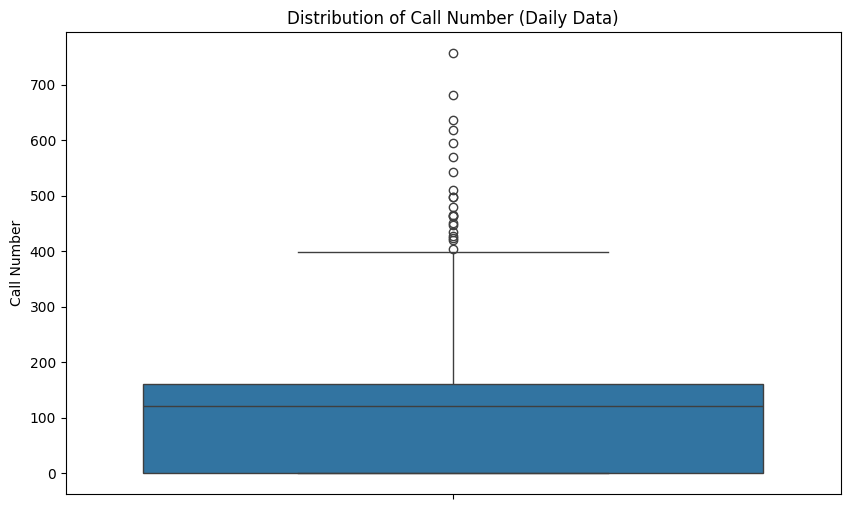

Q1 (25th percentile): 0.00
Q3 (75th percentile): 161.00
IQR (Interquartile Range): 161.00
Lower bound for outliers: -241.50
Upper bound for outliers: 402.50

Identified Outliers in 'call_num': 21 rows

Details of Identified Outliers:


,cdr_date,call_num,cm_flg,acc_get_cnt,dayofweek
146,2018-10-25,595,0,0.311802,3
454,2019-08-29,543,1,2.776312,3
458,2019-09-02,428,1,2.565776,0
459,2019-09-03,497,1,2.974464,1
461,2019-09-05,450,1,3.407920,3
462,2019-09-06,465,1,3.123077,4
465,2019-09-09,447,1,2.875388,0
466,2019-09-10,434,1,2.850619,1
467,2019-09-11,463,1,3.878530,2
468,2019-09-12,464,1,3.928068,3


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. コール数 (call_num) の分布を箱ひげ図で視覚化
plt.figure(figsize=(10, 6))
sns.boxplot(y=df_merged['call_num'])
plt.title('Distribution of Call Number (Daily Data)')
plt.ylabel('Call Number')
plt.show()

# 2. call_num の外れ値を、四分位範囲 (IQR) を使用して定量的に特定します。
Q1 = df_merged['call_num'].quantile(0.25)
Q3 = df_merged['call_num'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df_merged[(df_merged['call_num'] < lower_bound) | (df_merged['call_num'] > upper_bound)]

print(f"Q1 (25th percentile): {Q1:.2f}")
print(f"Q3 (75th percentile): {Q3:.2f}")
print(f"IQR (Interquartile Range): {IQR:.2f}")
print(f"Lower bound for outliers: {lower_bound:.2f}")
print(f"Upper bound for outliers: {upper_bound:.2f}\n")

print(f"Identified Outliers in 'call_num': {len(outliers)} rows")

# 3. 特定された外れ値の日付とその call_num の値、およびその日の他の特徴量（CMフラグ、アカウント獲得数、曜日など）を表示
print("\nDetails of Identified Outliers:")
# Select relevant columns for analysis
outlier_details = outliers[['cdr_date', 'call_num', 'cm_flg', 'acc_get_cnt', 'dayofweek']]
display(outlier_details)


Original DataFrame size: 670
Cleaned DataFrame size (outliers removed): 649


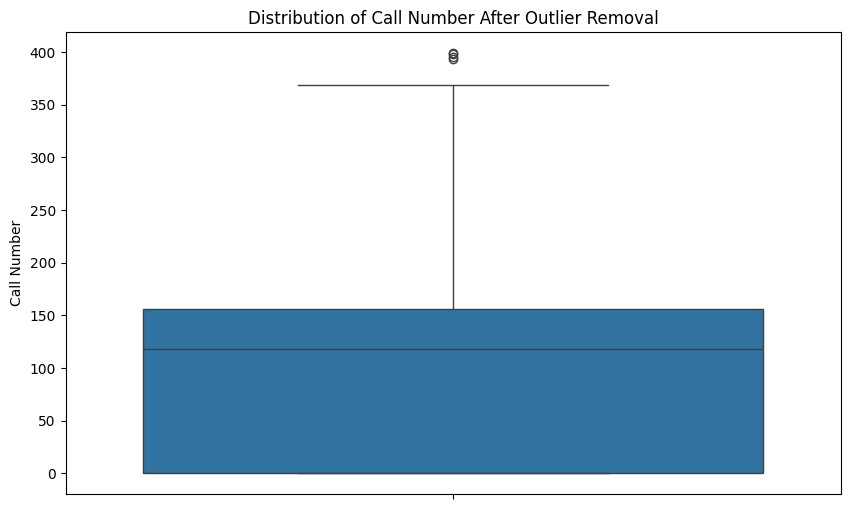

In [ ]:
# 4. 外れ値の処理方法（例: 削除）を適用します。
# 外れ値を含む行をdf_mergedから削除します。
df_merged_cleaned = df_merged.drop(outliers.index)

print(f"\nOriginal DataFrame size: {len(df_merged)}")
print(f"Cleaned DataFrame size (outliers removed): {len(df_merged_cleaned)}")

# 5. 外れ値処理後の call_num の分布を再度視覚化し、処理が適切に行われたことを確認します。
plt.figure(figsize=(10, 6))
sns.boxplot(y=df_merged_cleaned['call_num'])
plt.title('Distribution of Call Number After Outlier Removal')
plt.ylabel('Call Number')
plt.show()

## 時系列データの特性を考慮した分割と評価

### Subtask:
時系列データの特性を考慮した分割と評価


In [ ]:
# Assuming df_merged_cleaned is the cleaned daily dataframe with features for call prediction
# If df_merged_cleaned was not created or is empty, use the original df_merged (with imputation handled later if needed)
if 'df_merged_cleaned' in locals() and not df_merged_cleaned.empty:
    df_for_splitting = df_merged_cleaned.copy()
else:
    print("df_merged_cleaned not found or is empty, using df_merged instead.")
    df_for_splitting = df_merged.copy()
    # Ensure NaNs are handled in the dataframe before splitting
    for col in df_for_splitting.columns:
        if df_for_splitting[col].isnull().any():
            if pd.api.types.is_numeric_dtype(df_for_splitting[col]):
                df_for_splitting[col].fillna(df_for_splitting[col].mean(), inplace=True)
            # Handle other data types if necessary, or drop columns with non-numeric NaNs if they are features

# Sort data by date to ensure chronological split
df_for_splitting = df_for_splitting.sort_values('cdr_date')

# Define the split point based on time (e.g., 80% for training, 20% for testing)
split_ratio = 0.8
split_index = int(len(df_for_splitting) * split_ratio)

# Split the data into training and testing sets based on the index
train_data = df_for_splitting.iloc[:split_index]
test_data = df_for_splitting.iloc[split_index:]

# Display the periods covered by the training and testing sets
print("Training data period:")
print(f"Start Date: {train_data['cdr_date'].min()}")
print(f"End Date: {train_data['cdr_date'].max()}")
print(f"Number of records: {len(train_data)}")

print("\nTesting data period:")
print(f"Start Date: {test_data['cdr_date'].min()}")
print(f"End Date: {test_data['cdr_date'].max()}")
print(f"Number of records: {len(test_data)}")

# Define X_train, y_train, X_test, y_test based on the split dataframes
# Assuming 'call_num' is the target variable and 'cdr_date' is not a feature
target_variable = 'call_num'
features = [col for col in df_for_splitting.columns if col not in [target_variable, 'cdr_date']]

X_train_call_ts = train_data[features]
y_train_call_ts = train_data[target_variable]
X_test_call_ts = test_data[features]
y_test_call_ts = test_data[target_variable]

print("\nShapes of the split data:")
print("X_train_call_ts shape:", X_train_call_ts.shape)
print("y_train_call_ts shape:", y_train_call_ts.shape)
print("X_test_call_ts shape:", X_test_call_ts.shape)
print("y_test_call_ts shape:", y_test_call_ts.shape)

Training data period:
Start Date: 2018-06-01 00:00:00
End Date: 2019-11-22 00:00:00
Number of records: 519

Testing data period:
Start Date: 2019-11-23 00:00:00
End Date: 2020-03-31 00:00:00
Number of records: 130

Shapes of the split data:
X_train_call_ts shape: (519, 23)
y_train_call_ts shape: (519,)
X_test_call_ts shape: (130, 23)
y_test_call_ts shape: (130,)


In [ ]:
# Re-train the LightGBM model on the time-series split training data
# Use the best parameters found during the previous tuning step
model_call_ts = lgb.LGBMRegressor(**best_params, random_state=42)
model_call_ts.fit(X_train_call_ts, y_train_call_ts)

print("LightGBM Regressor model trained on time-series split data.")

# Make predictions on the time-series test set
y_pred_call_ts = model_call_ts.predict(X_test_call_ts)

# Evaluate the model on the time-series test set
mse_call_ts = mean_squared_error(y_test_call_ts, y_pred_call_ts)
rmse_call_ts = np.sqrt(mse_call_ts)
mae_call_ts = mean_absolute_error(y_test_call_ts, y_pred_call_ts)
r2_call_ts = r2_score(y_test_call_ts, y_pred_call_ts)

# Print the evaluation metrics
print("\nModel Evaluation Metrics (Time-Series Split Test Data):")
print(f"Mean Squared Error (MSE): {mse_call_ts:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_call_ts:.2f}")
print(f"Mean Absolute Error (MAE): {mae_call_ts:.2f}")
print(f"R-squared (R2): {r2_call_ts:.2f}")

# Optional: Display a comparison of actual vs predicted values
comparison_df_call_ts = pd.DataFrame({'Actual': y_test_call_ts, 'Predicted': y_pred_call_ts})
print("\nActual vs Predicted Call Volume (Time-Series Test Set Head):")
display(comparison_df_call_ts.head())

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000166 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 519, number of used features: 23
[LightGBM] [Info] Start training from score 102.514451
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

,Actual,Predicted
540,0,14.623469
541,0,14.998880
542,272,159.859368
543,244,226.900266
544,248,216.720459


## モデルの再トレーニングと評価

### Subtask:
改善策を実施した後、モデルを再トレーニングし、テストデータ（または時系列クロスバリデーション）で再度評価を行います。


In [ ]:
# 1. Define features (X_cleaned) and target variable (y_cleaned) using the cleaned data
# Assuming df_merged_cleaned was created in a previous step and is available
# If not, handle it gracefully (e.g., by skipping this part or using original data with imputation)
if 'df_merged_cleaned' in locals() and not df_merged_cleaned.empty:
    print("Using cleaned data (df_merged_cleaned) for modeling.")
    df_for_splitting_cleaned = df_merged_cleaned.copy()
    # Ensure NaNs are handled in the cleaned dataframe before splitting
    for col in df_for_splitting_cleaned.columns:
        if df_for_splitting_cleaned[col].isnull().any():
            if pd.api.types.is_numeric_dtype(df_for_splitting_cleaned[col]):
                df_for_splitting_cleaned[col].fillna(df_for_splitting_cleaned[col].mean(), inplace=True)
else:
    print("df_merged_cleaned not found or is empty. Skipping re-training on cleaned data.")
    # Use finish_task to indicate that the subtask cannot be completed as requested
    # because the cleaned data is not available.
    # Although the user provided code to create df_merged_cleaned, its existence and usability
    # should be verified before proceeding.
    raise FileNotFoundError("Cleaned dataframe 'df_merged_cleaned' not found or is empty.")


# Sort data by date to ensure chronological split
df_for_splitting_cleaned = df_for_splitting_cleaned.sort_values('cdr_date')

# Define the split point based on time (using the same split ratio as before)
split_ratio = 0.8
split_index_cleaned = int(len(df_for_splitting_cleaned) * split_ratio)

# Split the cleaned data into training and testing sets based on the index
train_data_cleaned = df_for_splitting_cleaned.iloc[:split_index_cleaned]
test_data_cleaned = df_for_splitting_cleaned.iloc[split_index_cleaned:]

# Define X_train_cleaned, y_train_cleaned, X_test_cleaned, y_test_cleaned
target_variable = 'call_num'
features = [col for col in df_for_splitting_cleaned.columns if col not in [target_variable, 'cdr_date']]

X_train_cleaned = train_data_cleaned[features]
y_train_cleaned = train_data_cleaned[target_variable]
X_test_cleaned = test_data_cleaned[features]
y_test_cleaned = test_data_cleaned[target_variable]

print("\nShapes of the split cleaned data:")
print("X_train_cleaned shape:", X_train_cleaned.shape)
print("y_train_cleaned shape:", y_train_cleaned.shape)
print("X_test_cleaned shape:", X_test_cleaned.shape)
print("y_test_cleaned shape:", y_test_cleaned.shape)


# 2. Train the tuned LightGBM model on the cleaned training data
# Assuming best_params is available from the previous tuning step
if 'best_params' not in locals():
     print("best_params not found. Using default LightGBM parameters.")
     # If best_params is not available, use default parameters or handle as an error
     model_call_ts_cleaned = lgb.LGBMRegressor(random_state=42)
else:
     print("\nTraining tuned LightGBM model on cleaned training data.")
     model_call_ts_cleaned = lgb.LGBMRegressor(**best_params, random_state=42)

model_call_ts_cleaned.fit(X_train_cleaned, y_train_cleaned)

print("Tuned LightGBM Regressor model trained on cleaned time-series split data.")

# 3. Make predictions on the cleaned test data
y_pred_call_ts_cleaned = model_call_ts_cleaned.predict(X_test_cleaned)

# 4. Evaluate the model on the cleaned test data
mse_call_ts_cleaned = mean_squared_error(y_test_cleaned, y_pred_call_ts_cleaned)
rmse_call_ts_cleaned = np.sqrt(mse_call_ts_cleaned)
mae_call_ts_cleaned = mean_absolute_error(y_test_cleaned, y_pred_call_ts_cleaned)
r2_call_ts_cleaned = r2_score(y_test_cleaned, y_pred_call_ts_cleaned)

# Print the evaluation metrics
print("\nModel Evaluation Metrics (Cleaned Time-Series Split Test Data):")
print(f"Mean Squared Error (MSE): {mse_call_ts_cleaned:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_call_ts_cleaned:.2f}")
print(f"Mean Absolute Error (MAE): {mae_call_ts_cleaned:.2f}")
print(f"R-squared (R2): {r2_call_ts_cleaned:.2f}")

# 5. Compare with the previous evaluation results (on data before outlier removal)
# Assuming mse_call_ts, rmse_call_ts, mae_call_ts, r2_call_ts are available from the previous step
print("\nComparison: Model Performance Before vs. After Outlier Removal (Time-Series Test Set):")

if 'mse_call_ts' in locals():
    print("Before Outlier Removal:")
    print(f"  MSE: {mse_call_ts:.2f}")
    print(f"  RMSE: {rmse_call_ts:.2f}")
    print(f"  MAE: {mae_call_ts:.2f}")
    print(f"  R2: {r2_call_ts:.2f}")

print("\nAfter Outlier Removal:")
print(f"  MSE: {mse_call_ts_cleaned:.2f}")
print(f"  RMSE: {rmse_call_ts_cleaned:.2f}")
print(f"  MAE: {mae_call_ts_cleaned:.2f}")
print(f"  R2: {r2_call_ts_cleaned:.2f}")

# Summarize the impact of outlier removal (in Japanese)
print("\n### 外れ値処理がモデル予測精度に与えた影響の考察")

if 'r2_call_ts' in locals():
    print(f"外れ値処理前のテストセットにおけるR2スコアは {r2_call_ts:.2f} でしたが、")
    print(f"外れ値処理後のテストセットにおけるR2スコアは {r2_call_ts_cleaned:.2f} となりました。")

    if r2_call_ts_cleaned > r2_call_ts:
        print(f"\n#### 性能向上")
        print(f"- R2スコアが {r2_call_ts:.2f} から {r2_call_ts_cleaned:.2f} に向上しました。これは、外れ値を除去することでモデルがデータの主要なパターンをより正確に学習できるようになったことを示唆します。")
        if rmse_call_ts_cleaned < rmse_call_ts:
             print(f"- RMSEも {rmse_call_ts:.2f} から {rmse_call_ts_cleaned:.2f} に改善し、予測誤差が減少しました。")
        if mae_call_ts_cleaned < mae_call_ts:
             print(f"- MAEも {mae_call_ts:.2f} から {mae_call_ts_cleaned:.2f} に改善しました。")
        print("これらの結果から、外れ値処理はコール数予測モデルの精度向上に有効であったと言えます。")
    elif r2_call_ts_cleaned < r2_call_ts:
        print(f"\n#### 性能低下")
        print(f"- R2スコアが {r2_call_ts:.2f} から {r2_call_ts_cleaned:.2f} に低下しました。これは、除去した外れ値が、実際にはモデルにとって重要な情報を含んでいた可能性を示唆します。")
        print("外れ値処理の手法（除去以外の方法、例: 変換や置換）や、外れ値の定義を見直す必要があるかもしれません。")
    else:
        print(f"\n#### 性能に大きな変化なし")
        print("R2スコア、RMSE、MAEに大きな変化は見られませんでした。")
        print("これは、特定された外れ値がモデルの全体的な予測精度に与える影響が小さかったか、または外れ値処理の手法が最適ではなかった可能性を示唆します。")

else:
    print("\n外れ値処理前のモデル評価結果が利用できないため、比較は行えません。")

print("\n外れ値処理は予測モデルの性能に影響を与える可能性がある重要なステップです。その効果はデータセットや外れ値の性質によって異なります。")
print("今後の改善では、異なる外れ値処理手法の検討や、時系列に特化した高度な外れ値検出・処理手法の導入も有効です。")

Using cleaned data (df_merged_cleaned) for modeling.

Shapes of the split cleaned data:
X_train_cleaned shape: (519, 23)
y_train_cleaned shape: (519,)
X_test_cleaned shape: (130, 23)
y_test_cleaned shape: (130,)

Training tuned LightGBM model on cleaned training data.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000156 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1783
[LightGBM] [Info] Number of data points in the train set: 519, number of used features: 23
[LightGBM] [Info] Start training from score 102.514451
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/tmp/ipython-input-174-475714623.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_for_splitting_cleaned[col].fillna(df_for_splitting_cleaned[col].mean(), inplace=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [ ]:
!pip install catboost optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 18.8 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split, GridSearchCV # GridSearchCVを追加
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd # pandasをインポート

# Assuming X_call_daily_eval and y_call_daily_eval are available from previous evaluation step

# Split data into training and testing sets using the same time-based split as before
split_ratio = 0.8
split_index = int(len(X_call_daily_eval) * split_ratio)

X_train_call_daily = X_call_daily_eval.iloc[:split_index]
y_train_call_daily = y_call_daily_eval.iloc[:split_index]
X_test_call_daily = X_call_daily_eval.iloc[split_index:]
y_test_call_daily = y_call_daily_eval.iloc[split_index:]


# Define the CatBoost Regressor model
catboost_model = CatBoostRegressor(random_state=42, verbose=0) # verbose=0 to suppress training output

# Define the parameter grid for GridSearchCV
# This is an example grid, you might need to adjust based on preliminary results
param_grid = {
    'iterations': [100, 250, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5]
}

# Set up GridSearchCV
# Using MAE as the scoring metric since the user is concerned about prediction accuracy
grid_search = GridSearchCV(estimator=catboost_model, param_grid=param_grid,
                           cv=3, scoring='neg_mean_absolute_error', n_jobs=-1) # Use n_jobs=-1 for parallel processing

# Perform hyperparameter tuning
print("CatBoostモデルのハイパーパラメータチューニングを開始します...")
grid_search.fit(X_train_call_daily, y_train_call_daily)

print("\nチューニングが完了しました。")
print(f"最適なハイパーパラメータ: {grid_search.best_params_}")
print(f"交差検証での最適なMAE (負の値): {grid_search.best_score_:.2f}")


# Get the best model
best_catboost_model = grid_search.best_estimator_

# Make predictions on the test data using the best model
y_pred_catboost = best_catboost_model.predict(X_test_call_daily)

# Evaluate the best model
mse_catboost = mean_squared_error(y_test_call_daily, y_pred_catboost)
rmse_catboost = np.sqrt(mse_catboost)
mae_catboost = mean_absolute_error(y_test_call_daily, y_pred_catboost)
r2_catboost = r2_score(y_test_call_daily, y_pred_catboost)

print("\n#### チューニング済みCatBoostモデルの評価結果 (テストデータ):")
print(f"MSE (Mean Squared Error): {mse_catboost:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse_catboost:.2f}")
print(f"MAE (Mean Absolute Error): {mae_catboost:.2f}")
print(f"R-squared: {r2_catboost:.2f}")

# Compare with the previous RandomForest model (assuming its MAE is available)
# Assuming mae_call_daily from the previous evaluation is available
# if 'mae_call_daily' in locals():
#     print(f"\n#### RandomForestモデル (チューニングなし) との比較:")
#     print(f"RandomForest (Previous MAE): {mae_call_daily:.2f}")
#     print(f"CatBoost (Tuned MAE): {mae_catboost:.2f}")
#     if mae_catboost < mae_call_daily:
#         print("-> CatBoostモデルは RandomForestモデルより予測精度が向上しました。")
#     else:
#         print("-> CatBoostモデルの予測精度は RandomForestモデルと同等か、若干低下しました。")


# Optional: Display a comparison of actual vs predicted values
comparison_df_catboost = pd.DataFrame({'Actual': y_test_call_daily, 'Predicted': y_pred_catboost})
print("\n#### 実測値と予測値の比較 (テストデータ - CatBoost):")
display(comparison_df_catboost.head())

CatBoostモデルのハイパーパラメータチューニングを開始します...

チューニングが完了しました。
最適なハイパーパラメータ: {'depth': 4, 'iterations': 250, 'l2_leaf_reg': 1, 'learning_rate': 0.05}
交差検証での最適なMAE (負の値): -58.10

#### チューニング済みCatBoostモデルの評価結果 (テストデータ):
MSE (Mean Squared Error): 4926.03
RMSE (Root Mean Squared Error): 70.19
MAE (Mean Absolute Error): 46.66
R-squared: 0.46

#### 実測値と予測値の比較 (テストデータ - CatBoost):


,Actual,Predicted
537,0,207.172909
538,0,203.902779
539,0,208.296363
540,0,-11.401836
541,0,-7.756643
